### Data Science Project By Hagay Samuel 



##### Dear examiner, I am sorry about cells that are duplicated and scattered around the project, Its beacuse I atached the 5 notebooks into one. Thank you :)

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# df = pd.read_csv('/content/drive/MyDrive/ds_shay/hotels_data.csv')
# df.to_csv('/content/drive/MyDrive/ds_shay/Hotels_data_Changed.csv')


### Mission 1: Add extra columns to data's CSV and save to new CSV file

a.	DayDiff 

b.	WeekDay

c.	DiscountDiff

d.	DiscountPerc

##### First of all, Lets have a look on our hotels data:

In [3]:
#this means that the graphs we will create are inline for the notebook
%matplotlib inline 
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ds_shay/hotels_data.csv')
df.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars
0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3
1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5
3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4


##### Now, lets start adding the wanted columns

###### a. DayDiff - number of days between the snapshot date and the checkin date

In [4]:
from datetime import datetime
from dateutil.parser import parse

def get_datetime(date_str):
    return datetime.strptime(date_str, '%m/%d/%Y %H:%M')

df["DayDiff"] = pd.DataFrame([get_datetime(val) for val in df["Checkin Date"]]) - pd.DataFrame([get_datetime(val) for val in df["Snapshot Date"]])
df.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff
0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26 days
1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33 days
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5,27 days
3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9 days
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26 days


###### b. WeekDay - checkin date day in the week (Sun/Mon/Tue/Wed/Thu/Fri/Sat) 

In [5]:
# Adds 'WeekDay' column
df["WeekDay"] = pd.DataFrame([get_datetime(val).weekday() for val in df["Checkin Date"]])
df.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff,WeekDay
0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26 days,2
1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33 days,2
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5,27 days,3
3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9 days,6
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26 days,2


###### c. DiscountDiff - the difference between the Original Price and the Discount Price

In [6]:
# Adds 'DiscountDiff' column
df["DiscountDiff"] = df["Original Price"] - df["Discount Price"]
df.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff,WeekDay,DiscountDiff
0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26 days,2,138
1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33 days,2,131
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5,27 days,3,130
3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9 days,6,72
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26 days,2,67


###### d. DiscountPerc - the discount size in percents

In [7]:
# Adds 'DiscountPerc' column
df["DiscountPerc"] = (df["DiscountDiff"]/df["Original Price"]) * 100
df.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff,WeekDay,DiscountDiff,DiscountPerc
0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26 days,2,138,11.714771
1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33 days,2,131,11.769991
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5,27 days,3,130,2.974828
3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9 days,6,72,4.140311
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26 days,2,67,3.852789


##### Now, after we added all wanted columns - lets save it to new CSV file

In [8]:
df.to_csv('/content/drive/MyDrive/ds_shay/Hotels_data_Changed.csv')

### Mission 2: Learning the best Discount Code by ML Classification

a. Find out for each (Snapshot Date+ Checkin Date + DayDiff + Hotel Name + WeekDay) the best Discount code(max discount) and save to new CSV file

b. Run 2 ML algorithms on the new CSV (Naive bayes, descision tree)

c. Show the different results between the two algorithms and talk about its meaning

d. Explain which parameters were the most significant ones and try quantify how much each parameter influencing

e. Show by statistical indicators the quality of your results (ROC, FP, FN)

###### first of all, we will read the new CSV we created 

In [9]:
dffulldata = pd.read_csv("/content/drive/MyDrive/ds_shay/Hotels_data_Changed.csv")
dffulldata.head()

,Unnamed: 0,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff,WeekDay,DiscountDiff,DiscountPerc
0,0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26 days,2,138,11.714771
1,1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33 days,2,131,11.769991
2,2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5,27 days,3,130,2.974828
3,3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9 days,6,72,4.140311
4,4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26 days,2,67,3.852789


###### Now we will convert the fields we are using in that mission to wanted types for later use

In [10]:
# Changes columns types
dffulldata['Checkin Date'] = pd.to_datetime(dffulldata['Checkin Date'])
dffulldata['Snapshot Date'] = pd.to_datetime(dffulldata['Snapshot Date'])
dffulldata['DayDiff'] = pd.to_timedelta(dffulldata['DayDiff'])

# Now we can see the new fields' types
dffulldata.dtypes

Unnamed: 0                   int64
Snapshot ID                  int64
Snapshot Date       datetime64[ns]
Checkin Date        datetime64[ns]
Days                         int64
Original Price               int64
Discount Price               int64
Discount Code                int64
Available Rooms              int64
Hotel Name                  object
Hotel Stars                  int64
DayDiff            timedelta64[ns]
WeekDay                      int64
DiscountDiff                 int64
DiscountPerc               float64
dtype: object

### We are ready to go, lets start!

###### a. Find out for each (Snapshot Date+ Checkin Date + DayDiff + Hotel Name + WeekDay) the best Discount Code(max discount) and save to new CSV file

We will use group by on the wanted fields, and in order to find the best dicount code we will use MAX function on DiscountPerc field

In [11]:
# 2.a

# dropping passed columns 
filtered_df = df.filter(["Hotel Name","DayDiff", "Checkin Date", "Snapshot Date", "WeekDay", "Discount Code","Available Rooms","Hotel Stars","DiscountPerc","DiscountDiff"], axis=1)
filtered_df.head()
#filtered_df.to_csv("Hotels_data_for_best_discount_code.csv")

,Hotel Name,DayDiff,Checkin Date,Snapshot Date,WeekDay,Discount Code,Available Rooms,Hotel Stars,DiscountPerc,DiscountDiff
0,Best Western Plus Seaport Inn Downtown,26 days,8/12/2015 0:00,7/17/2015 0:00,2,1,6,3,11.714771,138
1,Best Western Plus Seaport Inn Downtown,33 days,8/19/2015 0:00,7/17/2015 0:00,2,1,8,3,11.769991,131
2,The Peninsula New York,27 days,8/13/2015 0:00,7/17/2015 0:00,3,1,3,5,2.974828,130
3,Eventi Hotel a Kimpton Hotel,9 days,7/26/2015 0:00,7/17/2015 0:00,6,1,18,4,4.140311,72
4,Eventi Hotel a Kimpton Hotel,26 days,8/12/2015 0:00,7/17/2015 0:00,2,1,3,4,3.852789,67


In [12]:
filtered_df["MaxDis"] = filtered_df.groupby(["Hotel Name","DayDiff", "Checkin Date", "Snapshot Date", "WeekDay"])["DiscountDiff"].transform('max')
#filtered_df.sort_values(by=["Hotel Name","DayDiff", "Checkin Date", "Snapshot Date", "WeekDay"],ascending=False).reset_index()

grouped_df = filtered_df[filtered_df["DiscountDiff"]==filtered_df["MaxDis"]].drop_duplicates(["Hotel Name","DayDiff", "Checkin Date", "Snapshot Date", "WeekDay"])
grouped_df.drop(labels=["MaxDis"], axis=1,inplace=True)
grouped_df.head()
grouped_df.to_csv("/content/drive/MyDrive/ds_shay/Classification_Pre_Data.csv")
# Debug stuff for find the correct data 
#grouped_df.loc[(for_learn_df["Hotel Name"] == "1 Hotel Central Park") & (for_learn_df["DayDiff"] == "3 days") & (for_learn_df["Checkin Date"] == "11/14/2015 0:00") ]

##### Now, lets save the dataframe to new csv

###### b. Run 2 ML algorithms on the new CSV (Naive bayes, descision tree)

- firstly, we will load the Classification_Pre_Data.CSV, and change needed columns to have numeric values for later ML algorithms usage

In [13]:
clfdf = pd.read_csv("/content/drive/MyDrive/ds_shay/Classification_Pre_Data.csv")
clfdf.head()

# Set columns types
clfdf['Checkin Date'] = pd.to_datetime(clfdf['Checkin Date'])
clfdf['Snapshot Date'] = pd.to_datetime(clfdf['Snapshot Date'])
clfdf['DayDiff'] = pd.to_timedelta(clfdf['DayDiff'])

# Change columns to have numeric values for later ML algorithms usage
clfdf['WeekDay'] = clfdf['Checkin Date'].dt.dayofweek
clfdf['Checkin Date'] = clfdf['Checkin Date'].apply(lambda x: x.timestamp())
clfdf['Snapshot Date'] = clfdf['Snapshot Date'].apply(lambda x: x.timestamp())
clfdf['DayDiff'] = clfdf['DayDiff'].apply(lambda x: x.days)

clfdf.dtypes

Unnamed: 0           int64
Hotel Name          object
DayDiff              int64
Checkin Date       float64
Snapshot Date      float64
WeekDay              int64
Discount Code        int64
Available Rooms      int64
Hotel Stars          int64
DiscountPerc       float64
DiscountDiff         int64
dtype: object

In [14]:
# Change hotel name column from string to representive numeric values

## 
namesToNumbers = {}
namesCounter = 0

def namesToRepresentiveNumber(name):
    global namesToNumbers
    global namesCounter
    if name not in namesToNumbers:
        namesCounter += 1
        namesToNumbers[name] = namesCounter
    return namesToNumbers[name]

clfdf['Hotel Name'] = clfdf['Hotel Name'].apply(namesToRepresentiveNumber)

- lets prepare the data frames and split to test and training data sets

In [15]:
from sklearn import metrics

# Grab data
X = pd.DataFrame(clfdf,columns=['Snapshot Date', 'Checkin Date', 'DayDiff', 'Hotel Name', 'WeekDay'])

# Grab Target
Y = pd.DataFrame(clfdf,columns=['Discount Code'])

In [16]:
# Split the data into Trainging and Testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

###### Naive bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB

# Naive bayes classifier
nbmodel = MultinomialNB()

# Fit the training model
nbmodel.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [18]:
# Predicted outcomes
nbpredicted = nbmodel.predict(X_test)

In [19]:
# Actual Expected Outcomes
nbexpected = Y_test

# lets check accuarcy
print (metrics.accuracy_score(nbexpected, nbpredicted))

0.2368313140726934


###### decision tree 

In [20]:
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier()

# Fit the training model
dtmodel.fit(X_train,Y_train)

# Predicted outcomes
dtpredicted = dtmodel.predict(X_test)

# Actual Expected Outcomes
dtexpected = Y_test

# lets check accuarcy
print (metrics.accuracy_score(dtexpected, dtpredicted))

0.7925442684063374


#### c. Show the different results between the two algorithms and talk about its meaning

As we can see, the decision tree algorithm had better results than the naive bayes algorithm.
We can tell that there is a really significant advantage for the decision tree algorithm - much more accurate.

Naive base is an algorithm which based on the Bayes law, and gives us a capability of predicting given vector's class by observing the training data and calculating its statistics. supervised algorithm.
The main advantages of this algorithm are that it is pretty easy to implement, and really generic for different cases - but its main disadvantage is that it is counting on the fact that the features are independent.

In our case, we got from Naive Bayes a really low accuracy percent of 23.5%. (prediction percent by test data)

What probably caused this bad result is the strong correlation between lots of features. For example, between the check in date and the week day, or between the day difference and the combination of snapshot and check in date.

However, when we used the Decision Tree algorithm, we got a really much better result of 78.6% accuracy percent.
It's possible to understand that this algorithm fits much more better in that scneraio, and cares much less for the correlation between features.
At the other hand, this algorithm main disadvantage is that it tends to overfit - a thing that can be handled by pruning.

Now, we will try to use the decision tree for understanding what are the features that were the most siginficant ones in predicting the results - as we know, this algorithm, in each level of the tree, finds out which parameter gives us the best chance to predict the result and use it for building the next split.

#### d. Explain which parameters were the most significant ones and try quantify how much each parameter influencing

by looking on our decision tree - we can easily understand which parameters were the most significant ones and even quantify how much each parameter influencing.

In [21]:
# lets get this data from our decision tree
# ['Snapshot Date', 'Checkin Date', 'DayDiff', 'Hotel Name', 'WeekDay']
dtmodel.feature_importances_

array([0.21940883, 0.20156806, 0.1688153 , 0.37877698, 0.03143083])

As we can see, the most siginificiant feature is the hotel name - it is indeed very logical because finally every hotel has its own prices and probably has specific discount code which is the best especially for it. The importance of this feature is 39% - computed as the (normalized) total reduction of the criterion brought by that feature.

Just right after the Hotel name feature, we can see the two features of Snapshot Date and Checkin Date. (20-21%)
Those features correlate to the date someone wants to visit the hotel - ofcourse that it is logical that the time of the year you want to go to the hotel is influencing strongly on the best discount code for this time of the year - each season has its own code probably.

After those features we can see that the time spent in the hotel feature has 16.5% importance percent. Probably each different amount of time you spent in the hotel has its better discount code.

Finally, we can see that the day in the week you check in has 3% importance percent. It means that the best discount code doesn't really depends on the day in the week you check in the hotel.

#### e. Show by statistical indicators the quality of your results (ROC, FP, FN)


###### Naive bayes

In [22]:
# Lets calculate the TP and FP for each discount code
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(nbexpected, nbpredicted)

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

TPR = TP / (TP+FN)
FNR = FN / (TP+FN)
FPR = FP / (FP+TN)
print('False Negative')
print(FNR)
print('False Poisitive')
print(FPR)

False Negative
[0.63191244 0.81971798 0.98154104 0.48951555]
False Poisitive
[0.35833208 0.1459658  0.01199553 0.46079555]


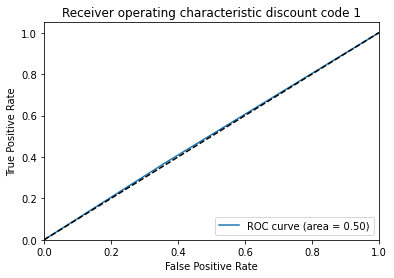

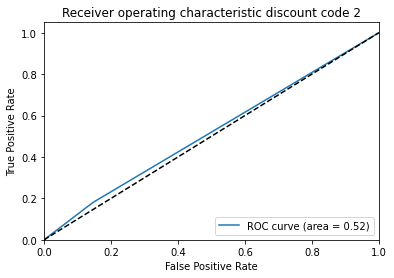

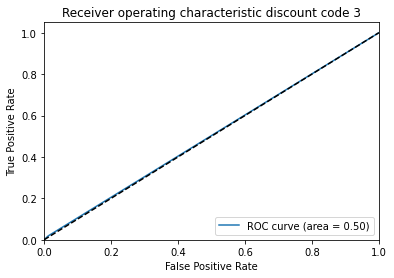

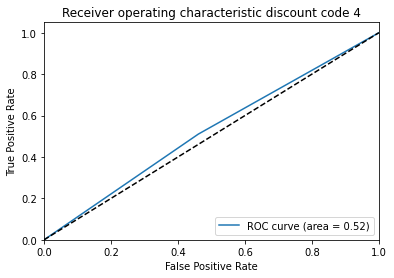

In [23]:
# Lets calculate the ROC for each discount code
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

exp = label_binarize(nbexpected.to_numpy(), classes=[1, 2, 3, 4])
pred = label_binarize(nbpredicted, classes=[1, 2, 3, 4])

n_classes = 4

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(exp[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic ' + 'discount code ' + str(i+1))
    plt.legend(loc="lower right")
    plt.show()

###### Decision Tree

In [24]:
# Lets calculate the TP and FP for each discount code
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(dtexpected, dtpredicted)

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

TPR = TP / (TP+FN)
FNR = FN / (TP+FN)
FPR = FP / (FP+TN)
print('False Negative')
print(FNR)
print('False Poisitive')
print(FPR)

False Negative
[0.20391705 0.20463815 0.20556566 0.22246324]
False Poisitive
[0.07137468 0.09170138 0.07410796 0.04476098]


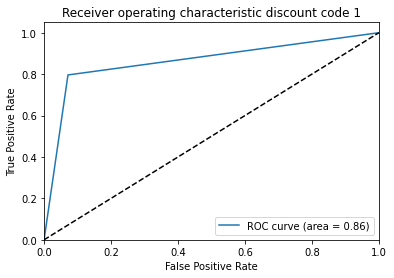

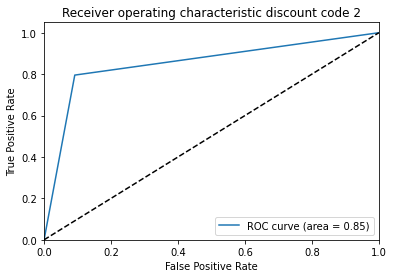

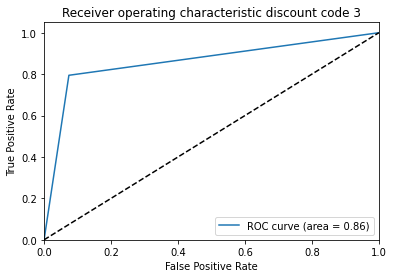

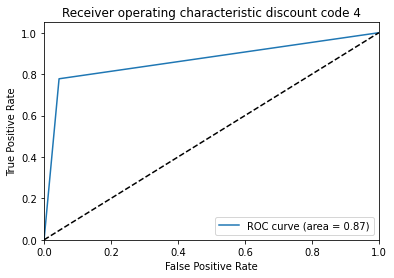

In [25]:
# Lets calculate the ROC for each discount code
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

exp = label_binarize(dtexpected.to_numpy(), classes=[1, 2, 3, 4])
pred = label_binarize(dtpredicted, classes=[1, 2, 3, 4])

n_classes = 4

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(exp[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic ' + 'discount code ' + str(i+1))
    plt.legend(loc="lower right")
    plt.show()

### Mission 3: Learning hotels clustering by their pricing policy - ML Clustering

a. find the 150 hotels which have the most rows in our origin csv and take only their data.

b. find the 40 check in dates which have the most rows and take only their data.

c. for each check in date - take the lowest price(after discount) for each discount code.(4 codes)
--> each hotel will have 160 columns of prices(40 dates * 4 discount codes)

d. normalize each price from 1 to 100.

e. take the data and use Hierarchical Clustering ML - show the results by Dendrogram which describes the different hotels clusters which have similar pricing policy. explain the meaning of the results.

In [26]:
import pandas as pd
fd = pd.read_csv("/content/drive/MyDrive/ds_shay/hotels_data.csv",parse_dates=[1,2])
fd.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars
0,1,2015-07-17,2015-08-12,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3
1,1,2015-07-17,2015-08-19,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3
2,1,2015-07-17,2015-08-13,5,4370,4240,1,3,The Peninsula New York,5
3,1,2015-07-17,2015-07-26,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4
4,1,2015-07-17,2015-08-12,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4


In [27]:
fd['Day Diff']=(fd['Checkin Date']-fd['Snapshot Date']).dt.days
fd.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,Day Diff
0,1,2015-07-17,2015-08-12,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26
1,1,2015-07-17,2015-08-19,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33
2,1,2015-07-17,2015-08-13,5,4370,4240,1,3,The Peninsula New York,5,27
3,1,2015-07-17,2015-07-26,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9
4,1,2015-07-17,2015-08-12,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26


In [28]:
#fd['WeekDay'] = fd['Checkin Date'].dt.weekday_name
# pd.DataFrame([get_datetime(val).weekday() for val in df["Checkin Date"]])
fd['WeekDay'] = pd.DataFrame([get_datetime(val).weekday() for val in df["Checkin Date"]])
fd.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,Day Diff,WeekDay
0,1,2015-07-17,2015-08-12,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26,2
1,1,2015-07-17,2015-08-19,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33,2
2,1,2015-07-17,2015-08-13,5,4370,4240,1,3,The Peninsula New York,5,27,3
3,1,2015-07-17,2015-07-26,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9,6
4,1,2015-07-17,2015-08-12,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26,2


In [29]:
fd['Discount Diff']=(fd['Original Price']-fd['Discount Price'])
fd.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,Day Diff,WeekDay,Discount Diff
0,1,2015-07-17,2015-08-12,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26,2,138
1,1,2015-07-17,2015-08-19,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33,2,131
2,1,2015-07-17,2015-08-13,5,4370,4240,1,3,The Peninsula New York,5,27,3,130
3,1,2015-07-17,2015-07-26,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9,6,72
4,1,2015-07-17,2015-08-12,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26,2,67


In [30]:
fd['Discount Perc']=((fd['Discount Diff']*100)/fd['Original Price'])
fd['Discount Perc'].format = '{:,.2f}'.format
fd.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,Day Diff,WeekDay,Discount Diff,Discount Perc
0,1,2015-07-17,2015-08-12,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26,2,138,11.714771
1,1,2015-07-17,2015-08-19,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33,2,131,11.769991
2,1,2015-07-17,2015-08-13,5,4370,4240,1,3,The Peninsula New York,5,27,3,130,2.974828
3,1,2015-07-17,2015-07-26,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9,6,72,4.140311
4,1,2015-07-17,2015-08-12,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26,2,67,3.852789


In [31]:
fd.to_csv('/content/drive/MyDrive/ds_shay/Hotels_data_Changed2.csv',encoding='UTF-8')

# Pre Processing

In [32]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ds_shay/Hotels_data_Changed2.csv",parse_dates=[1,2])
df = df.drop(['Unnamed: 0','Snapshot ID','Days','Original Price','Available Rooms','Hotel Stars'], axis=1)
df.head()

,Snapshot Date,Checkin Date,Discount Price,Discount Code,Hotel Name,Day Diff,WeekDay,Discount Diff,Discount Perc
0,2015-07-17,2015-08-12,1040,1,Best Western Plus Seaport Inn Downtown,26,2,138,11.714771
1,2015-07-17,2015-08-19,982,1,Best Western Plus Seaport Inn Downtown,33,2,131,11.769991
2,2015-07-17,2015-08-13,4240,1,The Peninsula New York,27,3,130,2.974828
3,2015-07-17,2015-07-26,1667,1,Eventi Hotel a Kimpton Hotel,9,6,72,4.140311
4,2015-07-17,2015-08-12,1672,1,Eventi Hotel a Kimpton Hotel,26,2,67,3.852789


## Initial analysis

In [33]:
print('Data Shape - ' , df.shape, '\n')
print('Data Description : \n' , df.describe())

Data Shape -  (187848, 9) 

Data Description : 
        Discount Price  Discount Code       Day Diff        WeekDay  \
count   187848.000000  187848.000000  187848.000000  187848.000000   
mean      1673.172283       2.434186      17.465685       2.917763   
std        983.618013       1.005191      10.040225       1.840536   
min        260.000000       1.000000       1.000000       0.000000   
25%       1035.000000       2.000000       9.000000       2.000000   
50%       1475.000000       2.000000      18.000000       3.000000   
75%       1963.250000       3.000000      26.000000       4.000000   
max      28675.000000       4.000000      34.000000       6.000000   

       Discount Diff  Discount Perc  
count  187848.000000  187848.000000  
mean      152.569860       8.877715  
std       143.316985       6.030248  
min        15.000000       0.581395  
25%        70.000000       4.844961  
50%       103.000000       7.056229  
75%       180.000000      10.933941  
max      3760.00

### Checking the discount code distribution

In [34]:
print(df.groupby('Discount Code').size())

Discount Code
1    39271
2    60301
3    55720
4    32556
dtype: int64


Text(0.5, 0, 'Graph 1.0 - Discount Code occurrences accross all data')

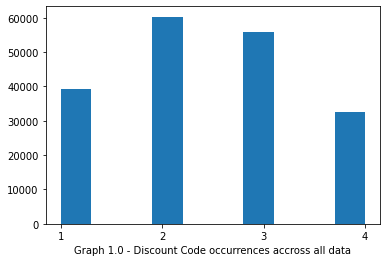

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.axes().set_xticks([1,2,3,4])
plt.hist(df['Discount Code'])
plt.xlabel('Graph 1.0 - Discount Code occurrences accross all data')

<blockquote>
    <h4>Discount code distribution accross our data</h4>
    <p>We can see from graph 1.0 that the discount codes are unbalanced accross our data, therefore it could cause an error to some of our conclusions about the data.</p>
</blockquote>

Text(0.5, 0, 'Graph 1.1 - Discount Code occurrences by Checkin Date')

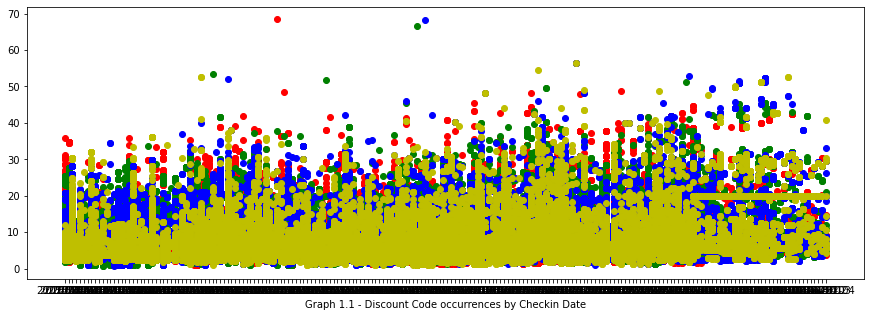

In [36]:
plt.rcParams['figure.figsize'] = [15,5]
plt.plot_date(df[df['Discount Code']==1]['Checkin Date'],df[df['Discount Code']==1]['Discount Perc'],color='r')
plt.plot_date(df[df['Discount Code']==2]['Checkin Date'],df[df['Discount Code']==2]['Discount Perc'],color='g')
plt.plot_date(df[df['Discount Code']==3]['Checkin Date'],df[df['Discount Code']==3]['Discount Perc'],color='b')
plt.plot_date(df[df['Discount Code']==4]['Checkin Date'],df[df['Discount Code']==4]['Discount Perc'],color='y')
plt.xlabel('Graph 1.1 - Discount Code occurrences by Checkin Date')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


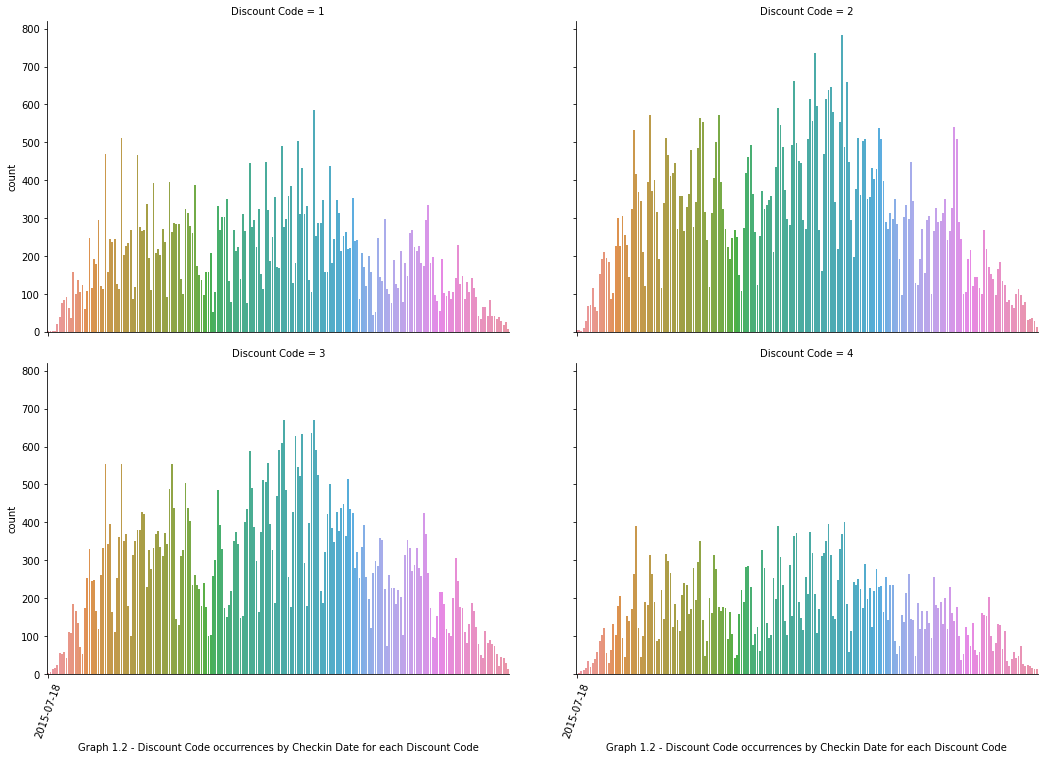

In [37]:
import seaborn as sns
df = df.sort_values(by = 'Checkin Date')
g =sns.factorplot('Checkin Date',data=df,kind='count',col='Discount Code',aspect = 1.5,col_wrap=2)
g.set_xticklabels(rotation=70,step=20)
g.set_xlabels('Graph 1.2 - Discount Code occurrences by Checkin Date for each Discount Code')

<blockquote>
    <h4>Discount code distiribution by the checkin date</h4>
    <p>We can see from graphs 1.1 and 1.2 that our discount codes are evenly distributed by the checkin date.</p>
    <p>We can also see from graph 1.2 that our discount codes amounts were in growth arround 10/15 to 12/15 simultaneously, which means more discounts were given arround those dates.</p>
</blockquote>

### Checking the Dates distribution

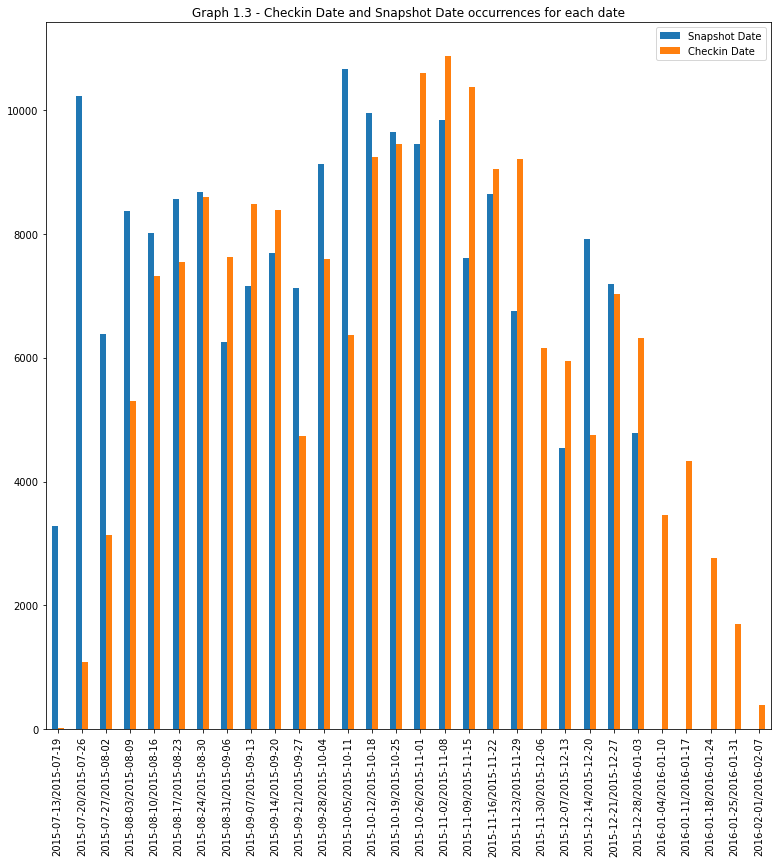

In [38]:
s = pd.to_datetime(pd.Series(df['Checkin Date']), format='%Y-%m-%d')
s.index = s.dt.to_period('w')
s = s.groupby(level=0).size()
s = s.reindex(pd.period_range(s.index.min(), s.index.max(), freq='w'), fill_value=0)

t = pd.to_datetime(pd.Series(df['Snapshot Date']), format='%Y-%m-%d')
t.index = t.dt.to_period('w')
t = t.groupby(level=0).size()
t = t.reindex(pd.period_range(t.index.min(), t.index.max(), freq='w'), fill_value=0)

pd.concat({
    'Snapshot Date': t, 'Checkin Date': s
}, axis=1).plot.bar(figsize=(13,13),title='Graph 1.3 - Checkin Date and Snapshot Date occurrences for each date')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


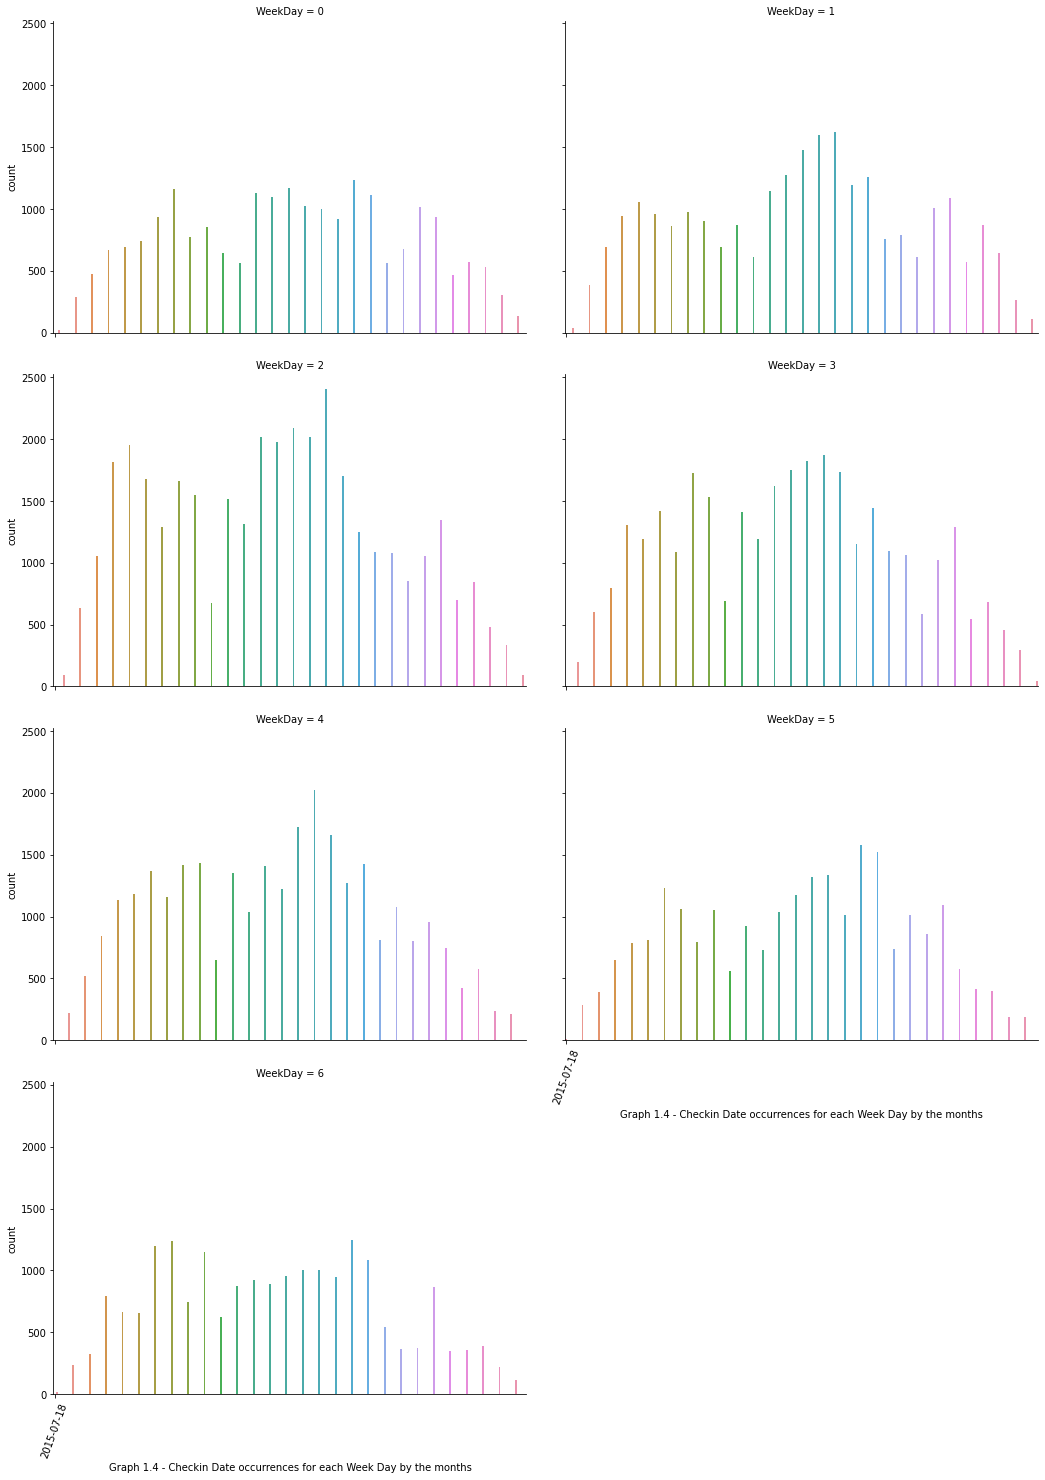

In [39]:
g =sns.factorplot('Checkin Date',data=df,kind='count',col='WeekDay',aspect = 1.5,col_wrap=2)
g.set_xticklabels(rotation=70,step=20)
g.set_xlabels('Graph 1.4 - Checkin Date occurrences for each Week Day by the months')

<blockquote>
    <h4>Checkin Date distiribution by Week day column</h4>
    <p>We can learn from graph 1.4 that there were significantly more invitations in the middle of the week, much more then the end of the week by amount.</p>
</blockquote>

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


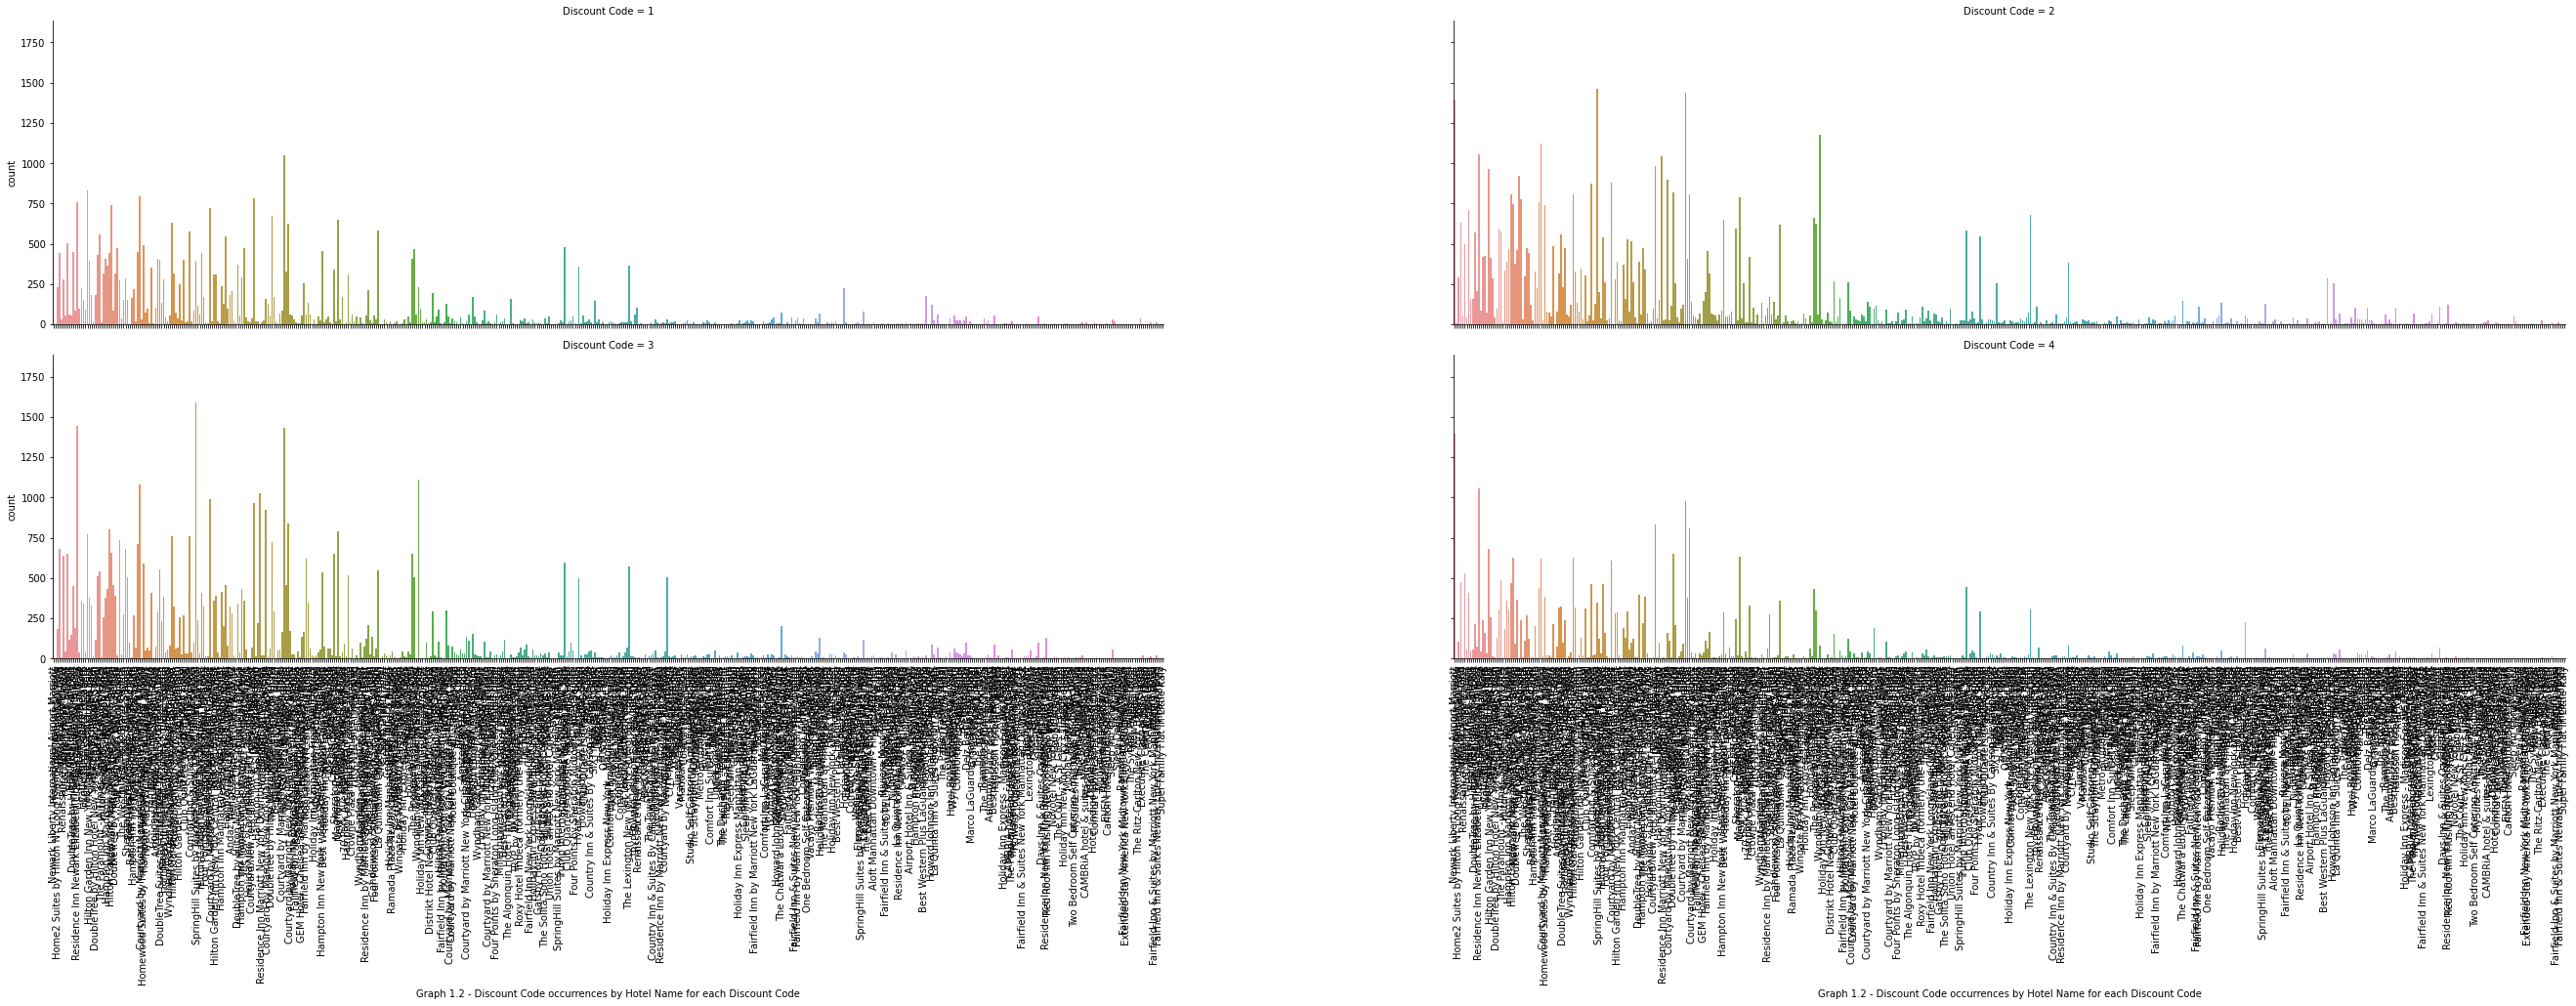

In [40]:
g =sns.factorplot('Hotel Name',data=df,kind='count',col='Discount Code',aspect = 4,col_wrap=2)
g.set_xticklabels(rotation=90)
g.set_xlabels('Graph 1.2 - Discount Code occurrences by Hotel Name for each Discount Code')

## Transforming the data params

In [41]:
import calendar
import numpy as np

# nornalize WeekDay monday-sanday [0,6]
listDays=list(calendar.day_name)
DaysMap=dict(zip(listDays,range(len(listDays))))
df['WeekDay']=df['WeekDay'].map(DaysMap)
print(DaysMap)

df.head()

{'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}


,Snapshot Date,Checkin Date,Discount Price,Discount Code,Hotel Name,Day Diff,WeekDay,Discount Diff,Discount Perc
65,2015-07-17,2015-07-18,1275,1,Newark Liberty International Airport Marriott,1,NaN,90,6.593407
365,2015-07-17,2015-07-18,515,2,Howard Johnson Inn Queens,1,NaN,33,6.021898
349,2015-07-17,2015-07-18,1245,2,Home2 Suites by Hilton NY Long Island City Man...,1,NaN,150,10.752688
262,2015-07-17,2015-07-18,3600,2,Park Hyatt New York,1,NaN,100,2.702703
359,2015-07-17,2015-07-18,667,2,Ramada Staten Island,1,NaN,113,14.487179


### Checking Discount Diff vs Discount Perc relations

Text(0.5, 1.03, 'Graph 1.6 - Discount Diff vs Discount Perc regression models for each code')

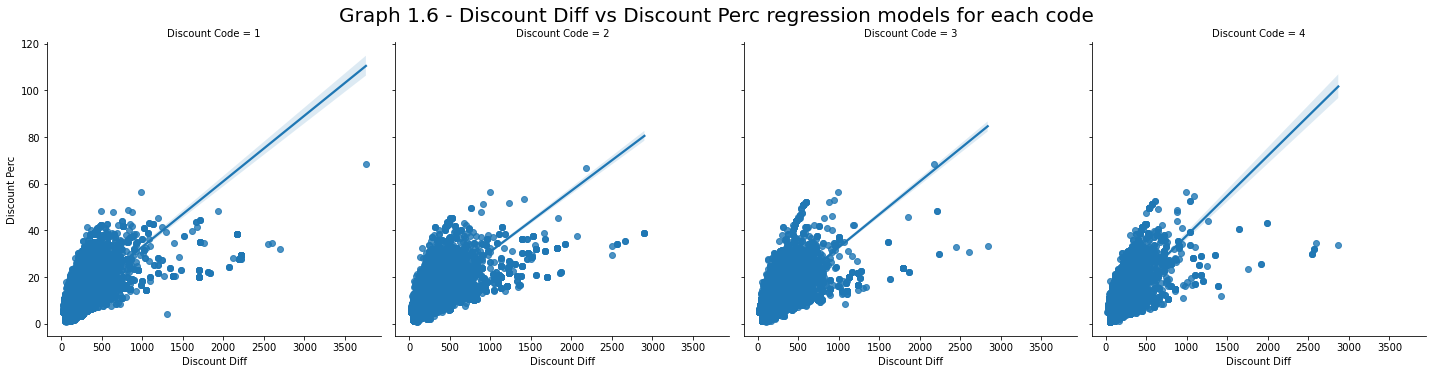

In [42]:
plotter = sns.lmplot(data=df,x='Discount Diff',y='Discount Perc',col='Discount Code')
plotter.fig.suptitle('Graph 1.6 - Discount Diff vs Discount Perc regression models for each code',fontsize=20, y=1.03)

In [43]:
Y=df['Discount Perc']
X=np.vstack(df['Discount Diff'])
X=np.array([[value,1] for value in X],dtype='float')
m,b = np.linalg.lstsq(X,Y)[0]
m,b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


(0.02827729242061832, 4.56345255226112)

Text(0, 0.5, 'Discount Perc')

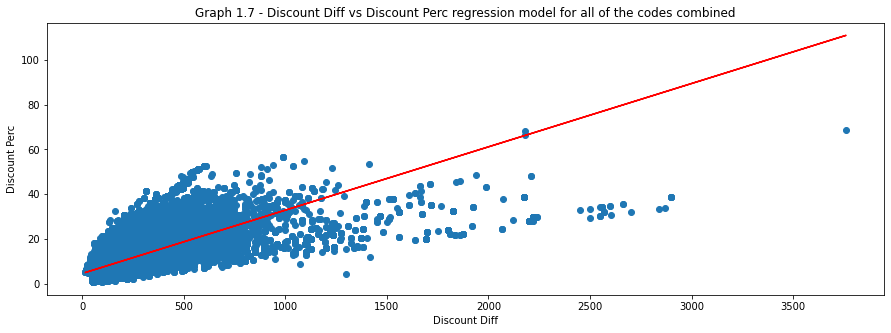

In [44]:
plt.plot(df['Discount Diff'],df['Discount Perc'],'o')
x=df['Discount Diff']
plt.plot(x,x*m+b,'r')
plt.title('Graph 1.7 - Discount Diff vs Discount Perc regression model for all of the codes combined')
plt.xlabel('Discount Diff')
plt.ylabel('Discount Perc')

In [45]:
result=np.linalg.lstsq(X,Y)
error_total=result[1]
rmse=np.sqrt(error_total/len(X))
print('The RMSE Of Our Model Is %.3f (By percentage)'%rmse)

The RMSE Of Our Model Is 4.465 (By percentage)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


<blockquote>
    <h4>Conclusions about the relation between discount percent and discount diff</h4>
    <p>The conclusions about the following relation is that it exists, first of all you can reffer to graphs 1.6 and 1.7 and see an almost clear regression relation between the two features.</p>
    <p>Moreover you can notice from graph 1.6 that there is such a connection for each of the different codes.</p>
    <p>In conclusion we can learn that it doesn't metter which feature we predict by, discount diff or perc, because of the linear connection between those features and the slight difference between them as you can see from the RMSE too.</p>
</blockquote>

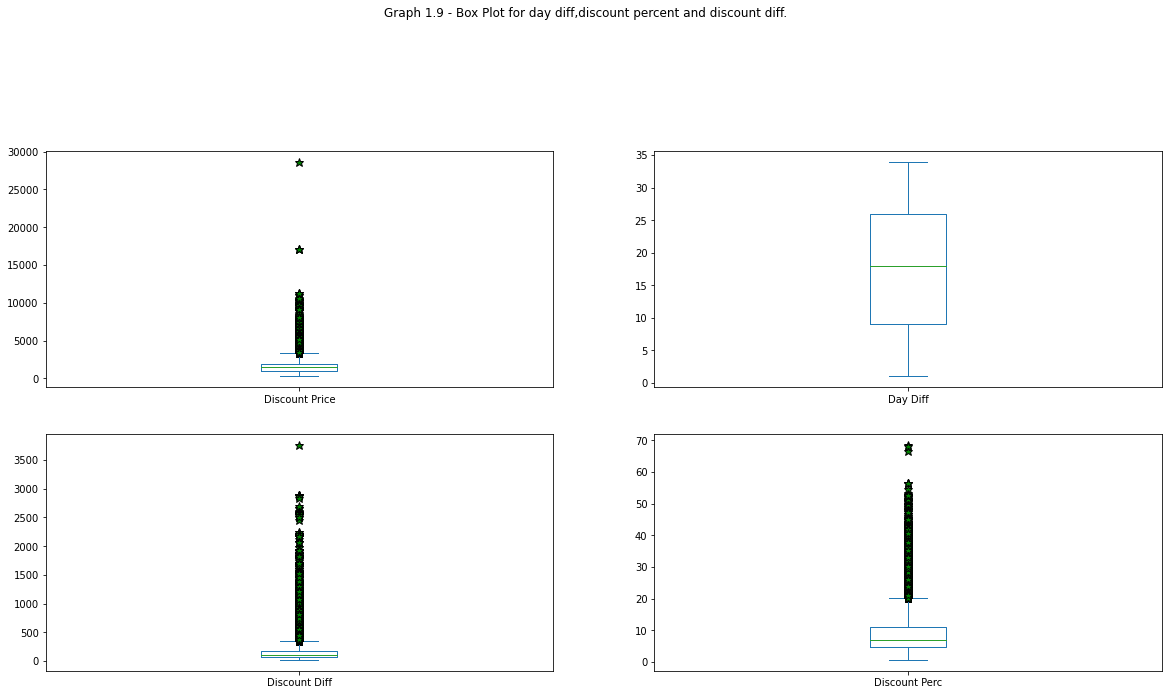

In [46]:
x=df.drop(['Discount Code','Snapshot Date','Hotel Name','WeekDay'], axis=1)
flierprops=dict(marker='*',markerfacecolor='green',markersize=9,linestyle='none')
x.plot(kind='box', subplots=True,flierprops=flierprops, layout=(4,2), sharex=False, sharey=False, figsize=(20,20), title='Graph 1.9 - Box Plot for day diff,discount percent and discount diff.')
plt.show()

In [47]:
disdata = [[x for x in df['Discount Diff'] if x>330],[ x for x in df['Discount Perc'] if x>20]]
print('Discount diff real and suspected outliers amount - ',len(disdata[0]) ,'\n\nDiscount Perc real and suspected outliers amount - ' , len(disdata[1]))

Discount diff real and suspected outliers amount -  15752 

Discount Perc real and suspected outliers amount -  10923


In [48]:
import pylab
import scipy
import scipy.stats as stats
#from scipy.stats import norm
#from sklearn import preprocessing

test_df=df.copy()
test_df['Discount Perc']=np.log(test_df['Discount Perc'])
test_df['Discount Diff']=np.log(test_df['Discount Diff'])
test_df['Discount Price']=np.log(test_df['Discount Price'])

In [49]:
def mufunc (X,label):
    groups = X.groupby(by=label).size()
    sumi = 0
    for i,d in groups.iteritems():
        sumi=sumi+(d*i/len(X))
    return sumi

def sigmfunc(X,label):
    mean = np.mean(X[label])
    sumi=0
    for i in X[label]:
        sumi=sumi+(np.power(i-mean,2))
    sumi=np.sqrt(sumi/len(X))
    return sumi

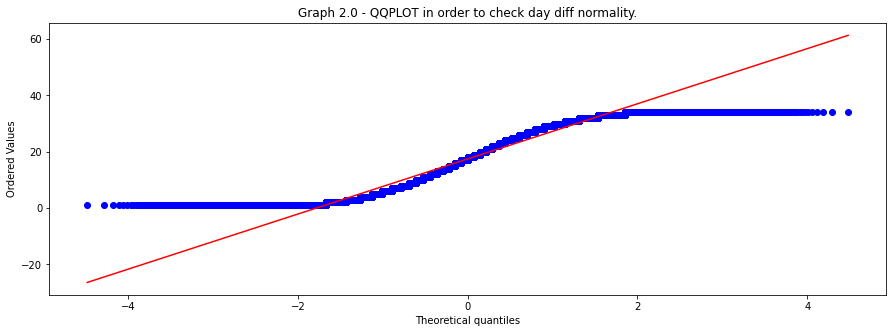

In [50]:
stats.probplot(test_df['Day Diff'],dist='norm',plot=pylab)
pylab.title('Graph 2.0 - QQPLOT in order to check day diff normality.')
pylab.show()

<blockquote>
    <h4>About the data outliers</h4>
    <p>We can see in graph 1.9 that there is 15752 real and suspected outliers for discount diff and 10923 for discount perc that we need to clean and modify.</p>
    <p>We can also see in graph 2.0 ,QQPlot of the day diff , that the day diff is not normal, but even points on a unified distribution, we suspect it is because it is discrete and can't be normalized due to he's discreteness.</p>
</blockquote>

### Cleaning the Outliers

In [51]:
all_outliers = np.array([],dtype='int64')
for feature in test_df.drop(['Snapshot Date','Checkin Date','Discount Code','Hotel Name','WeekDay','Day Diff'],axis=1).keys():
    Q1=np.percentile(test_df[feature],25)
    Q3=np.percentile(test_df[feature],75)
    step = 1.5*(Q3-Q1)
    outlier_pts=test_df[~((test_df[feature]>=Q1-step) & (test_df[feature]<=Q3+step))]
    all_outliers=np.append(all_outliers,outlier_pts.index.values.astype('int64'))
    #display(outlier_pts)
all_outliers,indices = np.unique(all_outliers,return_inverse=True)
counts = np.bincount(indices)
outliers = all_outliers[counts>0]
good_data=test_df.drop(test_df.index[outliers]).reset_index(drop=True)
good_data.describe()

,Discount Price,Discount Code,Day Diff,WeekDay,Discount Diff,Discount Perc
count,183485.000000,183485.000000,183485.000000,0.0,183485.000000,183485.000000
mean,7.282917,2.434482,17.464703,NaN,4.769176,1.995998
std,0.518688,1.005283,10.041932,NaN,0.669743,0.602584
min,5.560682,1.000000,1.000000,NaN,2.708050,-0.542324
25%,6.941190,2.000000,9.000000,NaN,4.248495,1.578666
50%,7.296413,2.000000,18.000000,NaN,4.634729,1.953922
75%,7.581720,3.000000,26.000000,NaN,5.192957,2.392631
max,10.263781,4.000000,34.000000,NaN,8.232174,4.225751


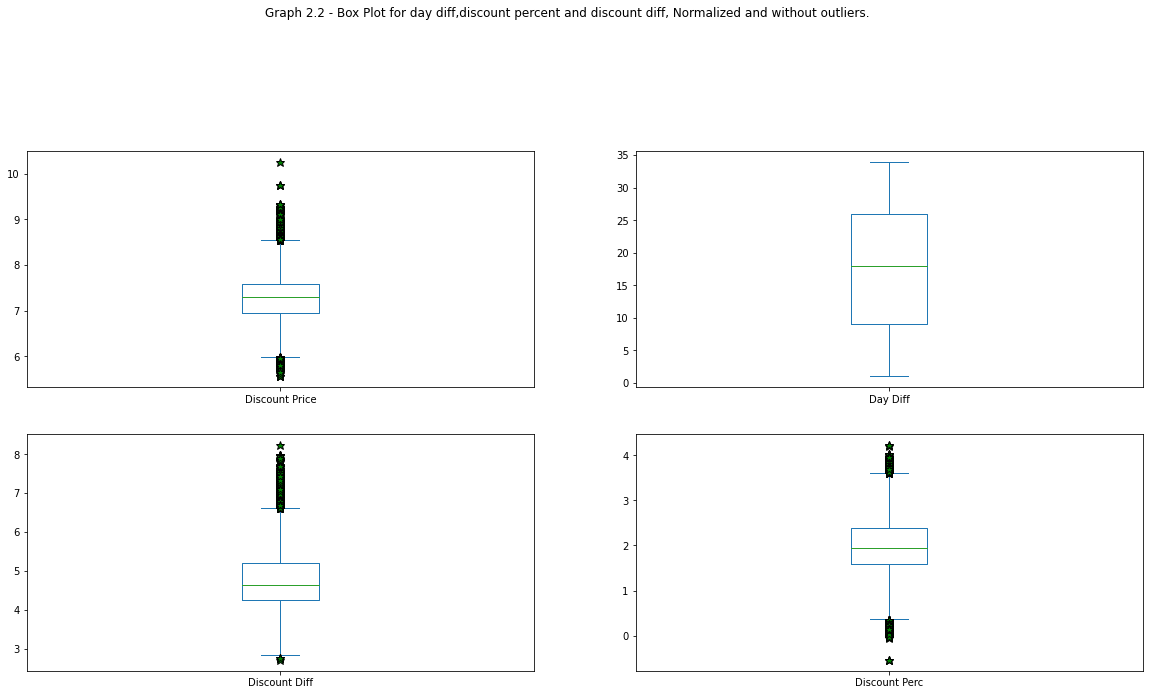

In [52]:
x=good_data.drop(['Discount Code','Snapshot Date','Hotel Name','WeekDay'], axis=1)
flierprops=dict(marker='*',markerfacecolor='green',markersize=9,linestyle='none')
x.plot(kind='box', subplots=True,flierprops=flierprops, layout=(4,2), sharex=False, sharey=False, figsize=(20,20), title='Graph 2.2 - Box Plot for day diff,discount percent and discount diff, Normalized and without outliers.')
plt.show()

<blockquote>
    <h4>Conclusions about the outliers</h4>
    <p>We found and dropped from our normal data 1989 clear outliers overall.</p>
</blockquote>

### Saving the transformed data to a csv

In [53]:
good_data.to_csv('/content/drive/MyDrive/ds_shay/Hotels_Good_Data.csv',encoding='UTF-8')
# '/content/drive/MyDrive/ds_shay/Hotels_data_Changed2.csv'

# Clustering

In [54]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ds_shay/Hotels_Good_Data.csv",parse_dates=[1,2])
df = df.drop(['Unnamed: 0','Snapshot Date','Day Diff','WeekDay','Discount Diff','Discount Perc'],axis=1)
df.head()

,Checkin Date,Discount Price,Discount Code,Hotel Name
0,2015-07-18,7.150701,1,Newark Liberty International Airport Marriott
1,2015-07-18,6.244167,2,Howard Johnson Inn Queens
2,2015-07-18,7.126891,2,Home2 Suites by Hilton NY Long Island City Man...
3,2015-07-18,8.188689,2,Park Hyatt New York
4,2015-07-18,6.502790,2,Ramada Staten Island


### 150 Hotels with highest number of records

In [55]:
num = df.groupby('Hotel Name').size().nlargest(150).sum()
df['count'] = df.groupby('Hotel Name')['Hotel Name'].transform(len)
hotels_df = df.sort_values('count',ascending=False)[:num]
hotels_df.groupby('Hotel Name').size()

Hotel Name
Aloft Harlem                                       209
Andaz 5th Avenue - a concept by Hyatt             1309
Andaz Wall Street - a concept by Hyatt             853
Baccarat Hotel and Residences New York             200
Bentley Hotel                                      280
                                                  ... 
Wyndham Garden Brooklyn Sunset Park               2523
Wyndham Garden Chinatown                           216
Wyndham Garden Long Island City Manhattan View     290
Wyndham New Yorker                                 232
ink48 hotel a Kimpton Hotel                        271
Length: 150, dtype: int64

### 40 Checkin Dates with highest number of records

In [56]:
num=hotels_df.groupby('Checkin Date').size().nlargest(40).sum()
hotels_df['count'] = hotels_df.groupby('Checkin Date')['Checkin Date'].transform(len)
dates_df = hotels_df.sort_values('count',ascending=False)[:num]
dates_df.groupby('Checkin Date').size()

Checkin Date
2015-08-12    1733
2015-08-13    1181
2015-08-19    1811
2015-08-26    1519
2015-08-27    1217
2015-08-28    1216
2015-09-09    1574
2015-09-10    1601
2015-09-11    1310
2015-09-16    1399
2015-09-17    1368
2015-09-18    1284
2015-09-30    1373
2015-10-01    1286
2015-10-02    1220
2015-10-07    1205
2015-10-14    1812
2015-10-15    1425
2015-10-16    1272
2015-10-21    1810
2015-10-22    1638
2015-10-27    1222
2015-10-28    1842
2015-10-29    1598
2015-10-30    1379
2015-11-03    1200
2015-11-04    1863
2015-11-05    1673
2015-11-06    1785
2015-11-07    1242
2015-11-10    1529
2015-11-11    2252
2015-11-12    1627
2015-11-13    1527
2015-11-18    1541
2015-11-21    1413
2015-11-25    1158
2015-11-26    1335
2015-11-27    1280
2015-11-28    1344
dtype: int64

 ### Adding -1 to the table for non existing  Hotel Name,Checkin Date & discount code.

In [57]:
group=dates_df.groupby(['Hotel Name','Checkin Date','Discount Code'])
group = dates_df.loc[group['Discount Price'].idxmin()]
hotels = hotels_df.groupby('Hotel Name').size().index
checkins = dates_df.groupby('Checkin Date').size().index
new_df=pd.DataFrame(columns=group.columns)
for hotel in hotels:
    for date in checkins:
        for code in range(1,5):
            d=group[(group['Hotel Name'] == hotel) & (group['Checkin Date']==date) & (group['Discount Code']==code)]
            if(d.empty):
                new_df = new_df.append([{'Hotel Name': hotel , 'Checkin Date': date , 'Discount Code': code , 'Discount Price':-1}],ignore_index=True)
            else:
                 new_df = new_df.append(d,ignore_index=True)
new_df.drop('count',axis=1,inplace=True)
new_df.head()

,Checkin Date,Discount Price,Discount Code,Hotel Name
0,2015-08-12,-1,1,Aloft Harlem
1,2015-08-12,-1,2,Aloft Harlem
2,2015-08-12,-1,3,Aloft Harlem
3,2015-08-12,-1,4,Aloft Harlem
4,2015-08-13,-1,1,Aloft Harlem


### Creating discount prices table for a given hotel, checkin date and discount code.

In [58]:
def change_range(OldValue,OldMax,OldMin,NewMax,NewMin):
    return (((OldValue - OldMin) * (NewMax - NewMin)) / (OldMax - OldMin)) + NewMin

In [59]:
# check if minnominus1 is empty befor take the min
group_hotel = new_df.groupby(['Hotel Name'])
array=[]
for i in range(1,161):
    array.append(i)
hotels_df=pd.DataFrame(columns=array)
for index in group_hotel.groups:
    norm_values=new_df.loc[group_hotel.groups[index]]
    minnominus1 = norm_values[norm_values['Discount Price']>=0]
    array = []
    if (len(minnominus1)!=0):
        maximum=max(norm_values['Discount Price'])
        #minnominus1 = norm_values[norm_values['Discount Price']>=0]
        minimum=min(minnominus1['Discount Price'])
        if (maximum==minimum):
            maximum=maximum+1
        norm_values['Discount Price']=change_range(minnominus1['Discount Price'],maximum,minimum,100,0)
        norm_values.fillna(-1,inplace=True)
        for x in norm_values['Discount Price'].values:
            array.append(x)
    else:
        for x in norm_values['Discount Price'].values:
            array.append(x)
    hotels_df.loc[index]=array

hotels_df

,1,2,3,4,5,6,7,8,9,10,...,151,152,153,154,155,156,157,158,159,160
Aloft Harlem,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
Andaz 5th Avenue - a concept by Hyatt,-1.000000,-1.000000,27.657946,-1.0,-1.000000,-1.000000,-1.0,0.0,-1.000000,-1.000000,...,61.923312,-1.000000,-1.000000,92.633339,55.721728,77.305826,97.386421,60.753996,84.423294,100.0
Andaz Wall Street - a concept by Hyatt,32.914338,30.004924,32.195057,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,...,15.122295,11.622034,73.457579,41.090946,33.343382,59.156419,57.163375,47.098879,-1.000000,-1.0
Baccarat Hotel and Residences New York,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,88.093006,88.093006,40.148715,-1.000000,-1.000000,-1.000000,-1.0
Bentley Hotel,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,19.471394,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyndham Garden Brooklyn Sunset Park,-1.000000,69.180239,-1.000000,-1.0,75.219929,75.219929,-1.0,-1.0,55.910840,35.416759,...,2.759706,-1.000000,-1.000000,0.000000,5.923203,-1.000000,-1.000000,0.000000,30.653049,-1.0
Wyndham Garden Chinatown,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,47.825746,58.572318,-1.000000,64.302189,66.117666,-1.000000,-1.0
Wyndham Garden Long Island City Manhattan View,-1.000000,55.279946,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,38.060101,...,-1.000000,-1.000000,-1.000000,60.736576,-1.000000,-1.000000,61.009785,63.173210,-1.000000,-1.0
Wyndham New Yorker,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,49.725824,29.157439,-1.0


<blockquote>
    <p>
    The table contains discount prices for a given hotel, discount code and a checkin date.
    The prices are normalized between 0 to 100 and where the data is absence we marked it as -1.
    </p>
</blockquote>

## Clustering Algoritem and Dendrogram

### Checking different distance methods

In [60]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

#d(x,y) = min(dist(x[i],y[j]))
single = linkage(hotels_df)
single_grade, d = cophenet(single, pdist(hotels_df))

#Minimum deviation by centroids between two clusters centroids
ward = linkage(hotels_df, 'ward')
ward_grade, d = cophenet(ward, pdist(hotels_df))

#d(x,y) = max(dist(x[i],y[j]))
complete = linkage(hotels_df, 'complete')
complete_grade, d = cophenet(complete, pdist(hotels_df))

#d(x,y) = dist(center_x,center_y)/2
centroid = linkage(hotels_df, 'centroid')
centroid_grade, d = cophenet(centroid, pdist(hotels_df))

#d(x,y) = dist(median_x,median_y)/2
median = linkage(hotels_df, 'median')
median_grade, d = cophenet(median, pdist(hotels_df))

# average distance between clusters
average = linkage(hotels_df, 'average')
average_grade, d = cophenet(average, pdist(hotels_df))

#d(u,v) = (dist(s,v) + dist(t,v))/2
weighted = linkage(hotels_df, 'weighted')
weighted_grade, d = cophenet(weighted, pdist(hotels_df))

print('Single:' + str(single_grade))
print('Ward:' + str(ward_grade))
print('Complete:' + str(complete_grade))
print('Centroid:' + str(centroid_grade))
print('Median:' + str(median_grade))
print('Average:' + str(average_grade))
print('Weighted:' + str(weighted_grade))

Single:0.8720291503799645
Ward:0.5470016579363384
Complete:0.8244237263619906
Centroid:0.8510657349834878
Median:0.7644103488955282
Average:0.9102772329950422
Weighted:0.8664841166827201


<blockquote>
    <h4>Conclusions</h4>
    <p>
    We can see that the best performence are for the Average method, and the worst are for the Ward method.
        We believe that the reason for that is that the pricing policy for the given hotels is filled with outliers, and where the average method succeeds, the ward method, which relies on centroids of the clusters, fails.
    </p>
</blockquote>

### Dendogram

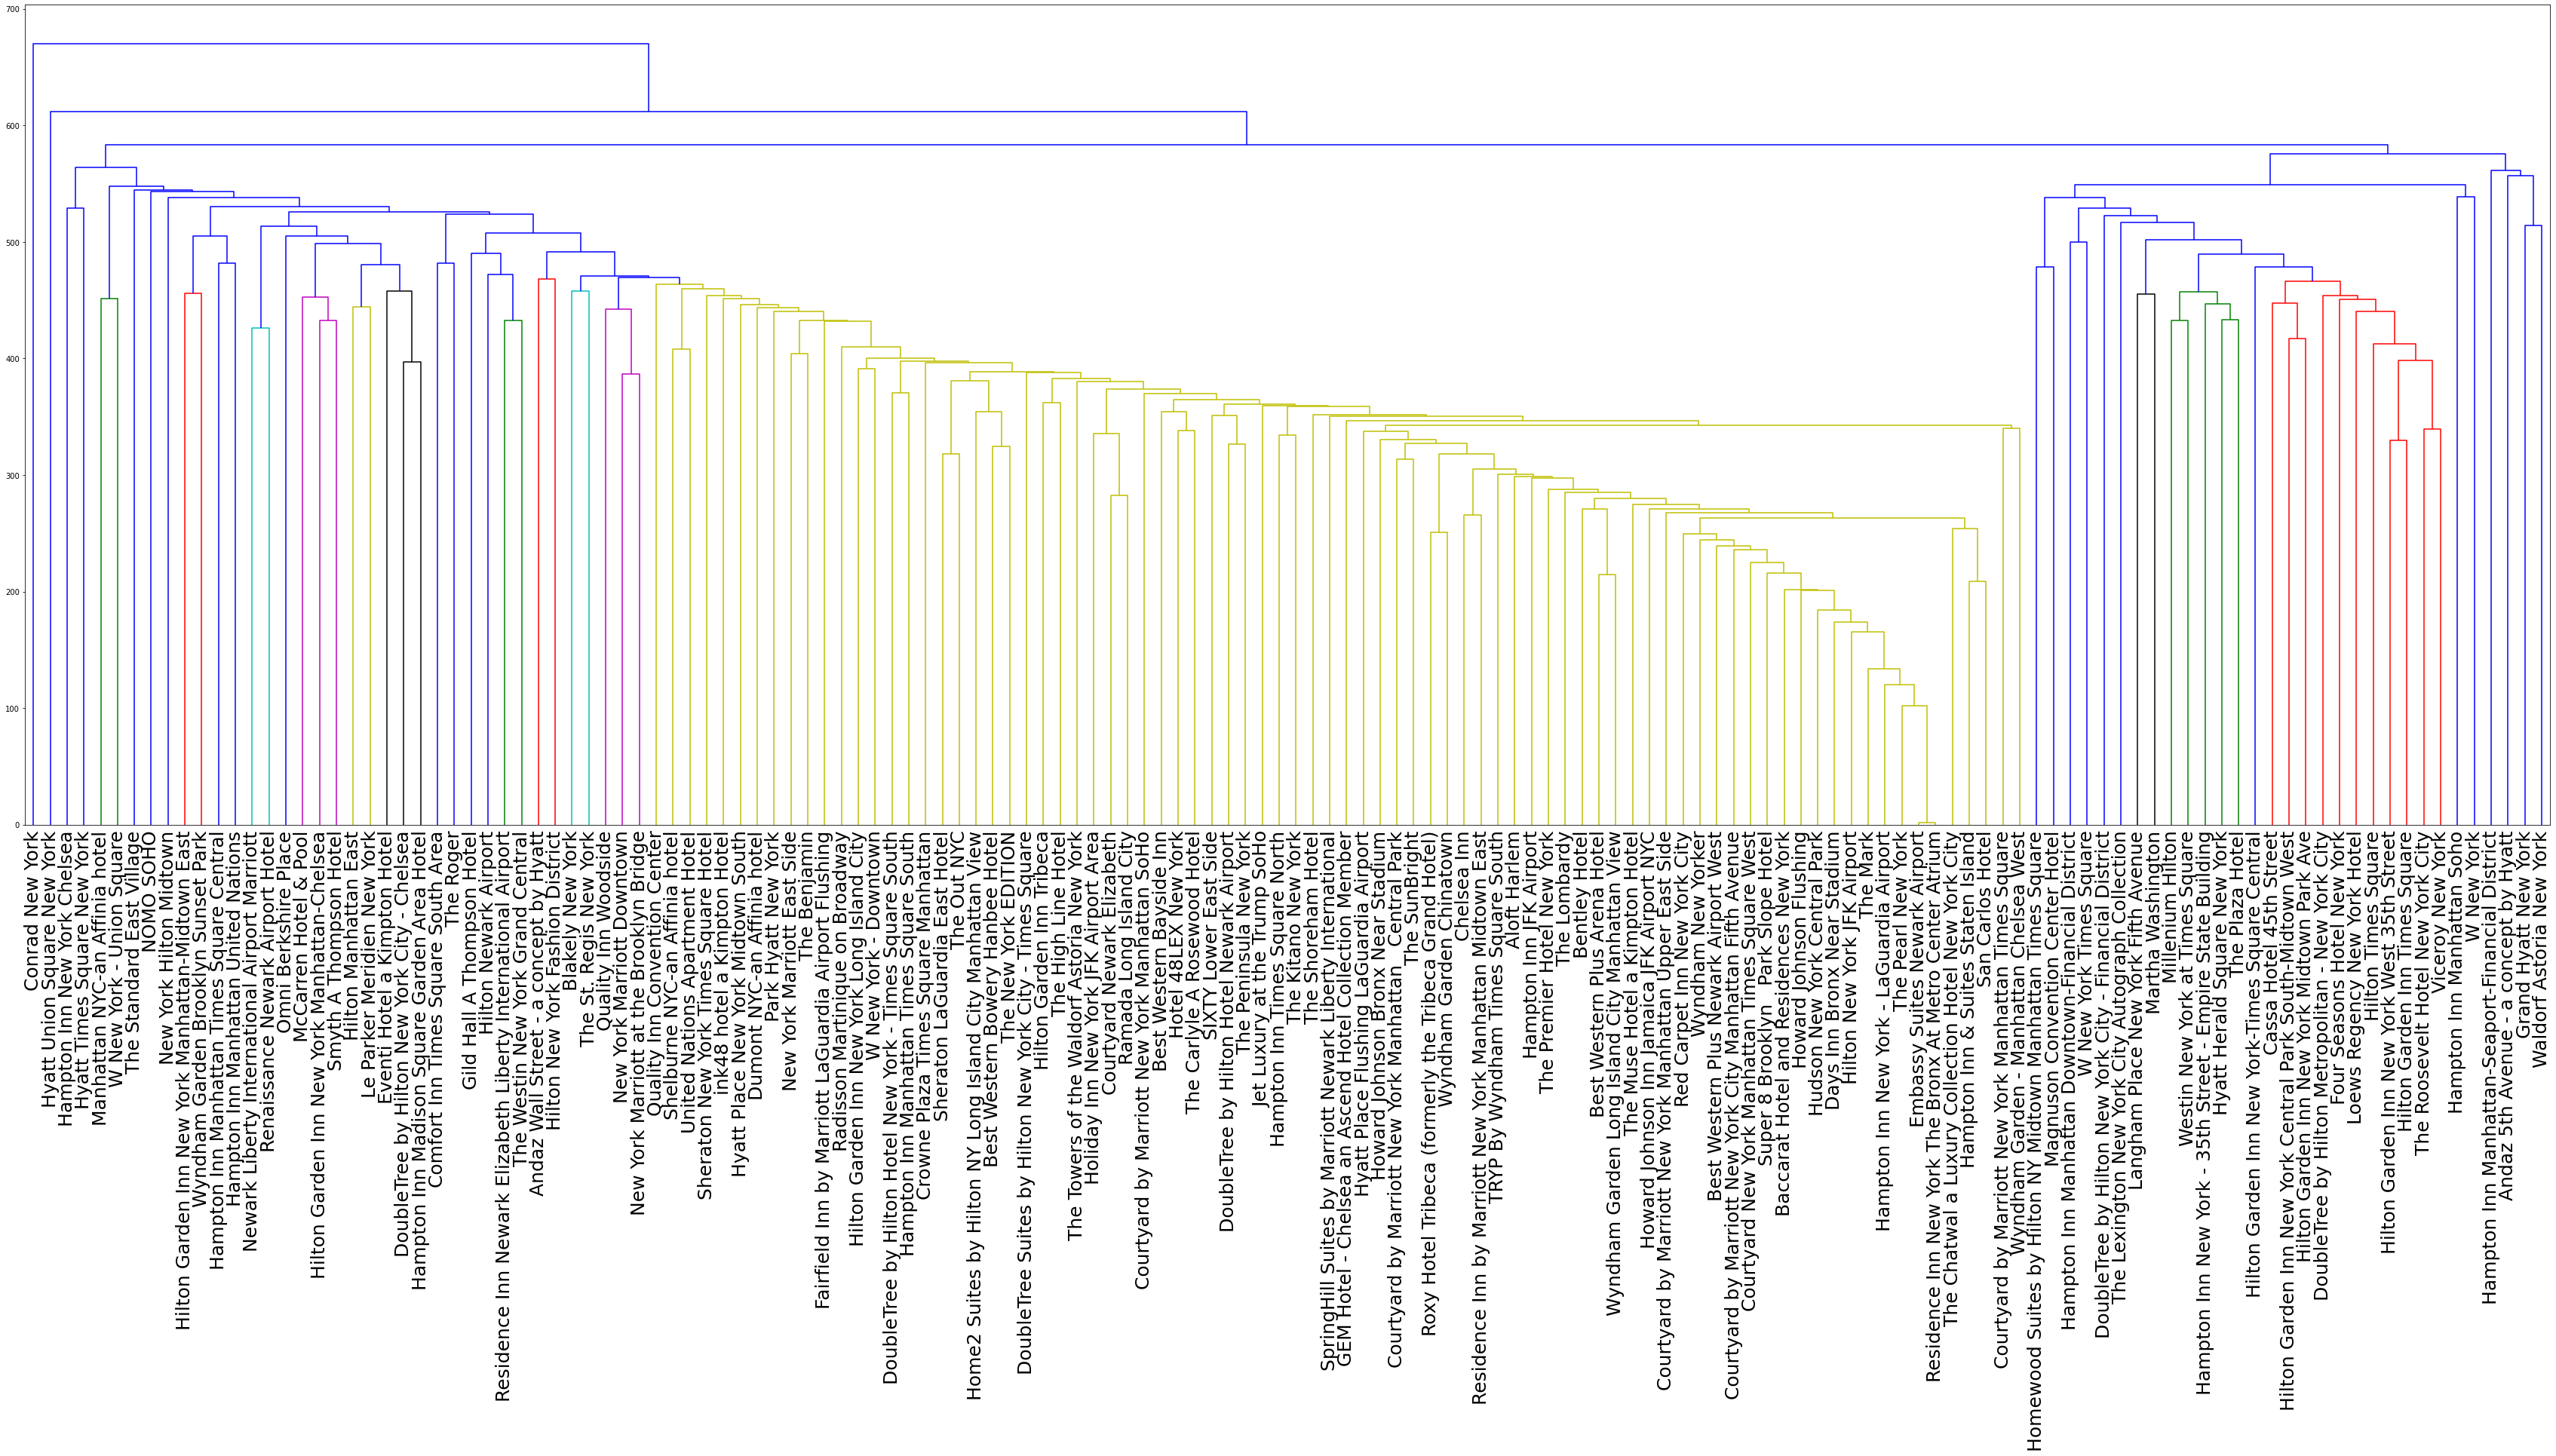

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.gcf()
h=hierarchy.dendrogram(average,labels=hotels_df.index,leaf_font_size=25,leaf_rotation=90)
fig.set_size_inches(60, 20, forward=True)
plt.show()

<blockquote>
    <h4>Dendrogram analysis</h4>
    <p>In the dendrogram above, the joined lines of the dendrogram indicates the order in which the clusters were joined.</p>
    <p>
    The heights of a splites reflect the distance between the clusters, for example we can see that hotel 'Embassy suits newark airport' and 'The perl new york' are most similar,as the height of the link that joins them together is the smallest.
    </p>
    <p>
    The dendrogram ,by ward distance method, shows us that are at least 2 clusters with a big difference between them, while The dendrogram ,by average distance method, shows us that are about 9 clusters with no big difference between them.
    </p>
    <p>
    Derived from the conclusions above we would have thought that there are two main pricing policies, but the ward ratings as we can see were low, so to conclude the average gave us better ratings so we can assume that there is for about 9 big different pricing policies.
    </p>
</blockquote>

### Mission 4: Predict Discount Price from SnapShot Date, Hotel Name, Discount Code and Checkin Date


In [62]:
import pandas as pd
from datetime import datetime
from sklearn.metrics import (roc_curve, auc, roc_auc_score, confusion_matrix)
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sn

In [63]:
df2 = pd.read_csv('/content/drive/MyDrive/ds_shay/hotels_data.csv')
df2.head() 

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars
0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3
1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5
3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4


In [64]:
df2['Checkin Date'] = pd.to_datetime(df2['Checkin Date'])
df2['Snapshot Date'] = pd.to_datetime(df2['Snapshot Date'])
df2['DayDiff'] = df2['Checkin Date'] - df2['Snapshot Date']
df2['DayDiff'] = df2['DayDiff'].apply(lambda x: x.days) 
df2["WeekDay"] = df2['Checkin Date'].dt.dayofweek
df2['DiscountDiff'] = df2['Original Price'] - df2['Discount Price']
df2['DiscountPerc'] = (df2['DiscountDiff']/df2['Original Price']) * 100

In [65]:
df2.head() 

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff,WeekDay,DiscountDiff,DiscountPerc
0,1,2015-07-17,2015-08-12,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26,2,138,11.714771
1,1,2015-07-17,2015-08-19,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33,2,131,11.769991
2,1,2015-07-17,2015-08-13,5,4370,4240,1,3,The Peninsula New York,5,27,3,130,2.974828
3,1,2015-07-17,2015-07-26,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9,6,72,4.140311
4,1,2015-07-17,2015-08-12,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26,2,67,3.852789


In [66]:
with open('/content/drive/MyDrive/ds_shay/Hotels_data_Changed.csv', 'w') as hs:
   df2.to_csv(hs)

In [67]:
df2 = pd.read_csv('/content/drive/MyDrive/ds_shay/Hotels_data_Changed.csv')
df2.head()

,Unnamed: 0,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff,WeekDay,DiscountDiff,DiscountPerc
0,0,1,2015-07-17,2015-08-12,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26,2,138,11.714771
1,1,1,2015-07-17,2015-08-19,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33,2,131,11.769991
2,2,1,2015-07-17,2015-08-13,5,4370,4240,1,3,The Peninsula New York,5,27,3,130,2.974828
3,3,1,2015-07-17,2015-07-26,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9,6,72,4.140311
4,4,1,2015-07-17,2015-08-12,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26,2,67,3.852789


In [68]:
# Checkin Date + DayDiff + Hotel Name
df = pd.DataFrame()
df['WeekDay'] = df2['WeekDay']
df['Snapshot Date'] = pd.to_datetime(df2['Snapshot Date'])
df['Checkin Date'] = pd.to_datetime(df2['Checkin Date'])
df['DayDiff'] = df2['DayDiff']
df['Hotel Name'] = df2['Hotel Name']
df['Discount Code'] = df2['Discount Code']
df['DiscountPerc'] = df2['DiscountPerc']
df['Discount Price'] = df2['Discount Price']


In [69]:
len(df['Hotel Name'].unique())

554

In [70]:
pd.to_datetime(df2['Snapshot Date']).apply(lambda x: x.value)

0         1437091200000000000
1         1437091200000000000
2         1437091200000000000
3         1437091200000000000
4         1437091200000000000
                 ...         
187843    1439596800000000000
187844    1439596800000000000
187845    1439596800000000000
187846    1439596800000000000
187847    1439596800000000000
Name: Snapshot Date, Length: 187848, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(df.drop('Discount Code', axis=1), df[['Discount Code']], test_size = 0.3, random_state = 41)

In [72]:
from sklearn.model_selection import GridSearchCV

def grid_search(model, X_train, y_train, params):
  cv = GridSearchCV(model, params, n_jobs=4, cv=3) 
  cv.fit(X_train, y_train)
  return cv

In [73]:
from sklearn.metrics import classification_report
def calc_results(model, x_test, y_true):
  preds = model.predict(x_test)
  return classification_report(y_true, preds, output_dict = True)
  


In [74]:
from sklearn.metrics import multilabel_confusion_matrix

def confusion_matrix_maker(y_test,y_pred):
    con_mat = multilabel_confusion_matrix(y_test, y_pred)
    true_negative = 0 
    true_positive = 0
    false_negative = 0  
    false_positive = 0
    for num_of_class in range(4):
        true_negative += con_mat[num_of_class][0][0]
        true_positive += con_mat[num_of_class][1][1]
        false_negative += con_mat[num_of_class][1][0] 
        false_positive += con_mat[num_of_class][0][1]
    true_positive_rate = true_positive/(true_positive+false_negative)
    true_negative_rate = true_negative/ (true_negative+false_positive)
    false_negative_rate = false_negative/ (false_negative+true_positive)
    false_positive_rate = false_positive/ (false_positive+true_negative)
    return true_negative_rate, true_positive_rate, false_negative_rate, false_positive_rate



In [75]:
def model_metrics(y_pred, y_test, res):
  accuracy = res['accuracy']
  precision = res['macro avg']['precision']
  recall = res['macro avg']['recall']
  tpr, tnr, fnr, fpr = confusion_matrix_maker(y_test,y_pred) 
  

  print('accuracy:' ,accuracy) 
  print('precision:' ,precision) 
  print('recall:',recall) 
  print('rates:',tpr, tnr, fnr, fpr)
  return accuracy, precision, recall, tpr, tnr, fnr, fpr

#**Preparing the data for clustering**

In [76]:
from pandas.core.arrays.categorical import contains
hotel_name_count = (df['Hotel Name'].value_counts())
hotel_appearance = hotel_name_count[:40]
hotel_appearance_min = hotel_name_count[39] 
df['number_of_hotel_appearance'] = df.groupby('Hotel Name')['Hotel Name'].transform('size')
df.drop(df[df['number_of_hotel_appearance'] < hotel_appearance_min].index, inplace = True)
df.drop('number_of_hotel_appearance', axis =1, inplace = True)
df

,WeekDay,Snapshot Date,Checkin Date,DayDiff,Hotel Name,Discount Code,DiscountPerc,Discount Price
5,4,2015-07-17,2015-08-07,21,Grand Hyatt New York,1,6.337047,1345
6,6,2015-07-17,2015-08-09,23,Grand Hyatt New York,1,5.631188,1525
7,2,2015-07-17,2015-08-12,26,Grand Hyatt New York,1,5.812102,1183
8,3,2015-07-17,2015-08-13,27,Grand Hyatt New York,1,4.378981,1201
14,2,2015-07-17,2015-07-22,5,Park Hyatt New York,1,3.846154,3750
...,...,...,...,...,...,...,...,...
187842,3,2015-08-15,2015-09-03,19,Cassa Hotel 45th Street,4,8.443272,1735
187843,4,2015-08-15,2015-09-04,20,Cassa Hotel 45th Street,4,3.007519,1935
187845,3,2015-08-15,2015-08-20,5,Hyatt Union Square New York,4,4.052198,1397
187846,2,2015-08-15,2015-09-02,18,Hyatt Union Square New York,4,3.343109,1648


##Filtering the data by 40 dates, dicsount codes ,and lowest price


In [77]:
new_df = df.copy().reset_index()
new_df.drop(['WeekDay', 'DayDiff', 'index', 'DiscountPerc'], axis=1 , inplace= True)
len(new_df['Hotel Name'].unique())


40

In [78]:
group_df = new_df.groupby(['Checkin Date', 'Hotel Name', 'Discount Code']).min()
group_df = group_df.reset_index()
group_df

,Checkin Date,Hotel Name,Discount Code,Snapshot Date,Discount Price
0,2015-07-18,Newark Liberty International Airport Marriott,1,2015-07-17,1275
1,2015-07-18,Newark Liberty International Airport Marriott,2,2015-07-17,1185
2,2015-07-18,Park Hyatt New York,2,2015-07-17,3600
3,2015-07-18,Park Hyatt New York,3,2015-07-17,3600
4,2015-07-18,Renaissance Newark Airport Hotel,2,2015-07-17,1055
...,...,...,...,...,...
12926,2016-02-04,Viceroy New York,1,2016-01-01,1015
12927,2016-02-04,Viceroy New York,2,2016-01-01,1018
12928,2016-02-04,Viceroy New York,3,2016-01-01,980
12929,2016-02-04,Viceroy New York,4,2016-01-01,1015


##Normalization (Hotel Name)

In [79]:
for name in group_df['Hotel Name'].unique():
  cond = group_df['Hotel Name'] == name
  group_df.loc[group_df['Hotel Name'] == name, 'Discount Price'] = ((group_df[cond]['Discount Price']-group_df[cond]['Discount Price'].min())/(group_df[cond]['Discount Price'].max()-group_df[cond]['Discount Price'].min()))*100
group_df


,Checkin Date,Hotel Name,Discount Code,Snapshot Date,Discount Price
0,2015-07-18,Newark Liberty International Airport Marriott,1,2015-07-17,80.219780
1,2015-07-18,Newark Liberty International Airport Marriott,2,2015-07-17,70.329670
2,2015-07-18,Park Hyatt New York,2,2015-07-17,11.605206
3,2015-07-18,Park Hyatt New York,3,2015-07-17,11.605206
4,2015-07-18,Renaissance Newark Airport Hotel,2,2015-07-17,59.938367
...,...,...,...,...,...
12926,2016-02-04,Viceroy New York,1,2016-01-01,2.929756
12927,2016-02-04,Viceroy New York,2,2016-01-01,3.035651
12928,2016-02-04,Viceroy New York,3,2016-01-01,1.694317
12929,2016-02-04,Viceroy New York,4,2016-01-01,2.929756


In [80]:
import random


rand_date = random.randint(0,12931)
random_date = group_df.iloc[rand_date]['Snapshot Date']
group_df['DayDiff'] = (group_df['Checkin Date']) - random_date

group_df['DayDiff'] = group_df['DayDiff'].apply(lambda x: x.days) 
group_df.head()

indexNames = group_df[ group_df['DayDiff'] >= 31 ].index
indexNames2 = group_df[ group_df['DayDiff'] < 0 ].index

# I dont need anymore the row of indexes 
filtered_df = group_df.drop(indexNames)
filtered_df.drop(indexNames2, inplace = True)
filtered_df


,Checkin Date,Hotel Name,Discount Code,Snapshot Date,Discount Price,DayDiff
1165,2015-08-13,Cassa Hotel 45th Street,1,2015-07-29,30.091185,0
1166,2015-08-13,Cassa Hotel 45th Street,2,2015-08-04,47.894051,0
1167,2015-08-13,Cassa Hotel 45th Street,3,2015-07-29,33.564915,0
1168,2015-08-13,Cassa Hotel 45th Street,4,2015-07-29,38.775510,0
1169,2015-08-13,Conrad New York,1,2015-08-08,37.727273,0
...,...,...,...,...,...,...
3477,2015-09-12,Viceroy New York,1,2015-08-09,34.274621,30
3478,2015-09-12,Viceroy New York,2,2015-08-09,46.028945,30
3479,2015-09-12,Westin New York at Times Square,2,2015-09-04,60.152057,30
3480,2015-09-12,Wyndham Garden Brooklyn Sunset Park,2,2015-09-09,61.373391,30


#Classification




## First we will encode the data 

In [81]:
#Here I encoded the hotel names and turned them  into numbers

temp_encoder = pd.get_dummies(filtered_df['Hotel Name'])
filtered_df = pd.concat((filtered_df[['Discount Code','DayDiff','Checkin Date', 'Snapshot Date','Discount Price']], temp_encoder),axis=1)
filtered_df.columns

#Here I encoded the dates to nano seconds
filtered_df['Checkin Date'] = filtered_df['Checkin Date'].apply(lambda x : x.value)
filtered_df['Snapshot Date'] = filtered_df['Snapshot Date'].apply(lambda x : x.value)
size = len(filtered_df.columns) 
print(size)
filtered_df


45


,Discount Code,DayDiff,Checkin Date,Snapshot Date,Discount Price,Cassa Hotel 45th Street,Conrad New York,DoubleTree by Hilton Hotel Newark Airport,DoubleTree by Hilton Metropolitan - New York City,Four Seasons Hotel New York,...,The Carlyle A Rosewood Hotel,The Lexington New York City Autograph Collection,The New York EDITION,The Plaza Hotel,The Roosevelt Hotel New York City,Viceroy New York,W New York - Union Square,W New York Times Square,Westin New York at Times Square,Wyndham Garden Brooklyn Sunset Park
1165,1,0,1439424000000000000,1438128000000000000,30.091185,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1166,2,0,1439424000000000000,1438646400000000000,47.894051,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1167,3,0,1439424000000000000,1438128000000000000,33.564915,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1168,4,0,1439424000000000000,1438128000000000000,38.775510,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1169,1,0,1439424000000000000,1438992000000000000,37.727273,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,1,30,1442016000000000000,1439078400000000000,34.274621,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3478,2,30,1442016000000000000,1439078400000000000,46.028945,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3479,2,30,1442016000000000000,1441324800000000000,60.152057,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3480,2,30,1442016000000000000,1441756800000000000,61.373391,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Test And Train Spilt

In [82]:
from pandas._libs.algos import pad_inplace
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(filtered_df.drop('Discount Price', axis=1), np.asarray(filtered_df['Discount Price'], dtype="|S6")
, test_size = 0.3, random_state = 41)



##Decision Tree


In [83]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier


tree_params = {
     'criterion': ['gini', 'entropy'],
     'min_samples_split': [2,4,8,10],
     'min_samples_leaf': [1,5,10,15,20]
 }

tree_cv = grid_search(DecisionTreeClassifier(), X_train, y_train, tree_params)
tree_cv.best_params_
y_pred = tree_cv.predict(x_test)
res = calc_results(tree_cv, x_test, y_test)
model_metrics(y_pred, y_test, res)
dt_accuracy, dt_precision, dt_recall, dt_true_negative_rate, dt_true_positive_rate, dt_false_negative_rate, dt_false_positive_rate = model_metrics(y_pred, y_test, res)

r2_score_decision_tree = r2_score(y_test, y_pred)



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


accuracy: 0.06465517241379311
precision: 0.025823353293413173
recall: 0.028609447771124414
rates: 0.998921639108555 0.0 1.0 0.0010783608914450035
accuracy: 0.06465517241379311
precision: 0.025823353293413173
recall: 0.028609447771124414
rates: 0.998921639108555 0.0 1.0 0.0010783608914450035


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

##Random Forest


In [84]:
from sklearn.ensemble import RandomForestClassifier


rf_params = {
    'n_estimators': [25],
    'random_state': [5],
    'criterion' : ['gini'],
    'min_samples_split' : [6],
    'min_samples_leaf' : [5]
}

model = RandomForestClassifier (n_estimators=100,random_state=42)

rf_cv = grid_search(model, X_train, y_train,rf_params)
rf_cv.best_params_
y_pred = rf_cv.predict(x_test)
res = calc_results(rf_cv, X_train, y_train)
model_metrics(y_pred, y_test, res)
rf_accuracy, rf_precision, rf_recall, rf_true_negative_rate, rf_true_positive_rate, rf_false_negative_rate, rf_false_positive_rate = model_metrics(y_pred, y_test, res)

r2_score_random_forest = r2_score(y_test, y_pred)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


accuracy: 0.4780999383096854
precision: 0.3385130903806814
recall: 0.4296331542021198
rates: 0.998921639108555 0.0 1.0 0.0010783608914450035
accuracy: 0.4780999383096854
precision: 0.3385130903806814
recall: 0.4296331542021198
rates: 0.998921639108555 0.0 1.0 0.0010783608914450035


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.

##Calculating final results


In [85]:
print('r2 score of decisiom tree: ' ,r2_score_decision_tree)
print('r2 score of Random Forest: ' ,r2_score_random_forest)

r2 score of decisiom tree:  0.5049471769599558
r2 score of Random Forest:  0.3427939287405469


##Conclusion:

The decision tree calssifier and a random forest calssifier can produce a fairly reliable prediction with a very small amount of data

# Spark Clustering (Question 5)

This is spark version for question number 3.

we are creating a cluster based on 150 hotels with top 40 check-ins by discount code.

Here we initialize spark

In [86]:
import pandas as pd
fd = pd.read_csv("/content/drive/MyDrive/ds_shay/hotels_data.csv",parse_dates=[1,2])
fd.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars
0,1,2015-07-17,2015-08-12,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3
1,1,2015-07-17,2015-08-19,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3
2,1,2015-07-17,2015-08-13,5,4370,4240,1,3,The Peninsula New York,5
3,1,2015-07-17,2015-07-26,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4
4,1,2015-07-17,2015-08-12,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4


In [87]:
fd['Day Diff']=(fd['Checkin Date']-fd['Snapshot Date']).dt.days
fd.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,Day Diff
0,1,2015-07-17,2015-08-12,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26
1,1,2015-07-17,2015-08-19,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33
2,1,2015-07-17,2015-08-13,5,4370,4240,1,3,The Peninsula New York,5,27
3,1,2015-07-17,2015-07-26,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9
4,1,2015-07-17,2015-08-12,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26


In [88]:
df = pd.read_csv('/content/drive/MyDrive/ds_shay/hotels_data.csv')
fd['WeekDay'] = pd.DataFrame([get_datetime(val).weekday() for val in df["Checkin Date"]])
fd.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,Day Diff,WeekDay
0,1,2015-07-17,2015-08-12,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26,2
1,1,2015-07-17,2015-08-19,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33,2
2,1,2015-07-17,2015-08-13,5,4370,4240,1,3,The Peninsula New York,5,27,3
3,1,2015-07-17,2015-07-26,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9,6
4,1,2015-07-17,2015-08-12,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26,2


In [89]:
fd['Discount Diff']=(fd['Original Price']-fd['Discount Price'])
fd.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,Day Diff,WeekDay,Discount Diff
0,1,2015-07-17,2015-08-12,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26,2,138
1,1,2015-07-17,2015-08-19,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33,2,131
2,1,2015-07-17,2015-08-13,5,4370,4240,1,3,The Peninsula New York,5,27,3,130
3,1,2015-07-17,2015-07-26,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9,6,72
4,1,2015-07-17,2015-08-12,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26,2,67


In [90]:
fd['Discount Perc']=((fd['Discount Diff']*100)/fd['Original Price'])
fd['Discount Perc'].format = '{:,.2f}'.format
fd.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,Day Diff,WeekDay,Discount Diff,Discount Perc
0,1,2015-07-17,2015-08-12,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26,2,138,11.714771
1,1,2015-07-17,2015-08-19,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33,2,131,11.769991
2,1,2015-07-17,2015-08-13,5,4370,4240,1,3,The Peninsula New York,5,27,3,130,2.974828
3,1,2015-07-17,2015-07-26,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9,6,72,4.140311
4,1,2015-07-17,2015-08-12,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26,2,67,3.852789


In [91]:
fd.to_csv('/content/drive/MyDrive/ds_shay/Hotels_data_Changed.csv',encoding='UTF-8')

In [92]:
!pip install pyspark
#from pyspark.sql import SparkSession
#spark = SparkSession.builder.appName("shay").getOrCreate()
!pip install findspark

import findspark
findspark.init()

from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import desc

spark = SparkSession.builder.master('local').appName('hotels').getOrCreate()
            
sc = spark.sparkContext 

 # Top 150 hotels
 Counted by apperance in the data file.

In [93]:
def ByHotelName(row):
    key = row['Hotel Name']
    val = 1
    return (key,val)

def countReduce(val1, val2):
    return (val1 + val2)

hotels_num = 150

hotels_rdd = spark.read.csv('/content/drive/MyDrive/ds_shay/Hotels_data_Changed.csv',header=True).rdd
hotel_names_top150 = hotels_rdd \
            .map(ByHotelName) \
            .reduceByKey(countReduce) \
            .sortBy(lambda x: x[1], ascending = False) \
            .map(lambda x: (x[0], x[1])) \
            .take(hotels_num)
            
hotel_names_keys = sc.parallelize(hotel_names_top150).keys().collect()
            
hotels_top = hotels_rdd.filter(lambda x: x['Hotel Name'] in hotel_names_keys)

for index,hotel in enumerate(hotel_names_top150):
    print (index+1, hotel[0],hotel[1])

1 Newark Liberty International Airport Marriott 5346
2 Hilton Garden Inn Times Square 4892
3 Residence Inn Newark Elizabeth Liberty International Airport 4314
4 Westin New York at Times Square 3792
5 Loews Regency New York Hotel 3617
6 Viceroy New York 3565
7 Four Seasons Hotel New York 3243
8 Langham Place New York Fifth Avenue 3203
9 The Carlyle A Rosewood Hotel 3078
10 DoubleTree by Hilton Metropolitan - New York City 2866
11 Magnuson Convention Center Hotel 2862
12 Hilton Garden Inn New York West 35th Street 2822
13 Hilton Garden Inn New York-Times Square Central 2772
14 Conrad New York 2677
15 Wyndham Garden Brooklyn Sunset Park 2599
16 Hilton Newark Airport 2524
17 Omni Berkshire Place 2358
18 Hilton Times Square 2273
19 Park Hyatt New York 2226
20 Homewood Suites by Hilton NY Midtown Manhattan Times Square 2211
21 Grand Hyatt New York 2165
22 The Plaza Hotel 2149
23 Quality Inn Woodside 2140
24 Hyatt Union Square New York 2114
25 Le Parker Meridien New York 2109
26 The New York 

# Top 40 check-ins hotels
 

In [94]:
def ByCheckinDate(row):
    key = row['Checkin Date']
    val = 1
    return (key,val)

checkin_date_num = 40

checkin_top = hotels_top \
            .map(ByCheckinDate) \
            .reduceByKey(countReduce) \
            .sortBy(lambda x: x[1], ascending = False) \
            .map(lambda x: (x[0], x[1])) \
            .take(checkin_date_num)

checkin_top_keys = sc.parallelize(checkin_top).keys().collect()
checkin_top_keys.sort()
            
top_hotels_in_date = hotels_top.filter(lambda x: x['Checkin Date'] in checkin_top_keys) \
                        .sortBy(lambda x: x['Discount Code']) \
                        .sortBy(lambda x: x['Hotel Name']) \
                        .sortBy(lambda x: x['Checkin Date'])

for index,date in enumerate(checkin_top):
    print(index+1,date[0],date[1])

1 2015-11-11 2302
2 2015-10-14 1887
3 2015-11-04 1885
4 2015-08-19 1883
5 2015-10-28 1861
6 2015-10-21 1817
7 2015-11-06 1808
8 2015-08-12 1765
9 2015-11-05 1684
10 2015-10-22 1662
11 2015-11-12 1649
12 2015-09-10 1623
13 2015-10-29 1623
14 2015-09-09 1616
15 2015-11-18 1582
16 2015-08-26 1559
17 2015-11-10 1548
18 2015-11-13 1547
19 2015-10-15 1473
20 2015-11-21 1469
21 2015-09-30 1464
22 2015-10-30 1412
23 2015-09-16 1407
24 2015-09-17 1402
25 2015-11-28 1383
26 2015-10-01 1373
27 2015-11-26 1356
28 2015-09-11 1332
29 2015-09-18 1326
30 2015-10-16 1309
31 2015-11-27 1306
32 2015-10-02 1280
33 2015-10-07 1257
34 2015-11-07 1256
35 2015-08-28 1251
36 2015-08-27 1239
37 2015-10-27 1227
38 2015-11-03 1215
39 2015-08-13 1210
40 2015-11-25 1175


## ***Cluster pre-process ***

Create a matrix that represents all of the hotels-prices-codes combinations.


(Including setting -1 for future missing data, since some hotels might have no data on some check-in dates)

In [95]:
def createAllKeys(hotels,dates,codes):
    names_keys = sc.parallelize(hotels)
    dates_keys = sc.parallelize(dates)
    codes_keys = sc.parallelize(codes)
    return names_keys.cartesian(dates_keys.cartesian(codes_keys)).map(lambda x: (x[0], x[1][0], x[1][1]))

hotels_date_price_missing_data = createAllKeys(hotel_names_keys,checkin_top_keys,['1','2','3','4']).map(lambda x: (x, -1))

## *** Structure the data ***

Manipulating the original csv file so we can use it later, for merging the data.



In [96]:
def HotelDatesDiscountCodeMapFunc(row):
    key = (row['Hotel Name'],row['Checkin Date'],row['Discount Code'])
    val = float(row['Discount Price'])
    return (key,val)


hotels_date_price = top_hotels_in_date.map(HotelDatesDiscountCodeMapFunc)

## *** Data merge ***

Scanning the original and manipulated file, to create a "image" that includes the minimal price for each key
Creating groups based on the hotel names,so we can use it while clustering the data.


In [97]:
def ByHotelAndCheckinDateReduceFunc(val1,val2):
    if val1 == -1:
        return val2
    elif val2 == -1:
        return val1
    else:
        return min(val1,val2)
    
hotels_date_price_all_values_before_group = sc.union([hotels_date_price_missing_data, hotels_date_price]).reduceByKey(ByHotelAndCheckinDateReduceFunc).sortByKey()
hotels_date_price_all_values = hotels_date_price_all_values_before_group.map(lambda x: (x[0][0], x[1])).groupByKey().sortByKey().mapValues(list)

In [98]:
import pandas as pd

columns = ['Hotel Name'] + [i for i in hotels_date_price_all_values_before_group.map(lambda x: (x[0][1], x[0][2])).distinct().sortBy(lambda x: x[1]).sortByKey().collect()]

pd.set_option('max_colwidth',200)
df = pd.DataFrame(hotels_date_price_all_values.map(lambda x: [x[0]] + x[1]).take(150), columns=columns)
df

,Hotel Name,"(2015-08-12, 1)","(2015-08-12, 2)","(2015-08-12, 3)","(2015-08-12, 4)","(2015-08-13, 1)","(2015-08-13, 2)","(2015-08-13, 3)","(2015-08-13, 4)","(2015-08-19, 1)",...,"(2015-11-26, 3)","(2015-11-26, 4)","(2015-11-27, 1)","(2015-11-27, 2)","(2015-11-27, 3)","(2015-11-27, 4)","(2015-11-28, 1)","(2015-11-28, 2)","(2015-11-28, 3)","(2015-11-28, 4)"
0,Aloft Harlem,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,Andaz 5th Avenue - a concept by Hyatt,-1.0,-1.0,1665.0,-1.0,-1.0,-1.0,-1.0,1339.0,-1.0,...,2181.0,-1.0,-1.0,2778.0,2077.0,2462.0,2884.0,2161.0,2604.0,2944.0
2,Andaz Wall Street - a concept by Hyatt,1365.0,1325.0,1355.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1138.0,1098.0,2066.0,1484.0,1371.0,1785.0,1749.0,1578.0,-1.0,-1.0
3,Baccarat Hotel and Residences New York,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,5225.0,5225.0,4250.0,-1.0,-1.0,-1.0,-1.0
4,Bentley Hotel,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1104.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Wyndham Garden Brooklyn Sunset Park,-1.0,1095.0,-1.0,-1.0,1135.0,1135.0,-1.0,-1.0,1012.0,...,738.0,-1.0,-1.0,726.0,752.0,-1.0,-1.0,726.0,871.0,-1.0
146,Wyndham Garden Chinatown,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,941.0,1017.0,-1.0,1060.0,1074.0,-1.0,-1.0
147,Wyndham Garden Long Island City Manhattan View,-1.0,833.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,872.0,-1.0,-1.0,874.0,890.0,-1.0,-1.0
148,Wyndham New Yorker,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,945.0,-1.0,1168.0,1070.0,-1.0


## *** Normalisation ***

Using a standart MinMax normalisation (price of -1 will stay -1 - missing data, when there is no diff return 0)



In [99]:
def normalise(prices):
    filtered_prices = list(filter(lambda x: x != -1, prices))
    
    if len(filtered_prices) == 0:
        return prices
    
    max_price = max(filtered_prices)
    min_price = min(filtered_prices)
    
    diff = max_price - min_price
    
    normalized_prices = []
    for price in prices:
        if price == -1:
            normalized_prices.append(price)
        elif diff == 0:
            normalized_prices.append(diff)
        else:
            normalized_prices.append(float(price - min_price) * 100/diff)
            
    return normalized_prices

normalised_hotels_prices = hotels_date_price_all_values.map(lambda x: (x[0], normalise(x[1])))
normalised_prices = normalised_hotels_prices.values()

df = pd.DataFrame(normalised_hotels_prices.map(lambda x: [x[0]] + x[1]).take(150), columns=columns)
df

,Hotel Name,"(2015-08-12, 1)","(2015-08-12, 2)","(2015-08-12, 3)","(2015-08-12, 4)","(2015-08-13, 1)","(2015-08-13, 2)","(2015-08-13, 3)","(2015-08-13, 4)","(2015-08-19, 1)",...,"(2015-11-26, 3)","(2015-11-26, 4)","(2015-11-27, 1)","(2015-11-27, 2)","(2015-11-27, 3)","(2015-11-27, 4)","(2015-11-28, 1)","(2015-11-28, 2)","(2015-11-28, 3)","(2015-11-28, 4)"
0,Aloft Harlem,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
1,Andaz 5th Avenue - a concept by Hyatt,-1.000000,-1.000000,20.311526,-1.0,-1.000000,-1.000000,-1.0,0.0,-1.000000,...,52.461059,-1.000000,-1.000000,89.657321,45.981308,69.968847,96.261682,51.214953,78.816199,100.0
2,Andaz Wall Street - a concept by Hyatt,22.478386,20.172911,21.902017,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,...,9.394813,7.089337,62.881844,29.337176,22.824207,46.685879,44.610951,34.755043,-1.000000,-1.0
3,Baccarat Hotel and Residences New York,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,...,-1.000000,-1.000000,-1.000000,85.714286,85.714286,35.064935,-1.000000,-1.000000,-1.000000,-1.0
4,Bentley Hotel,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,11.147851,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Wyndham Garden Brooklyn Sunset Park,-1.000000,62.648557,-1.000000,-1.0,69.439728,69.439728,-1.0,-1.0,48.556876,...,2.037351,-1.000000,-1.000000,0.000000,4.414261,-1.000000,-1.000000,0.000000,24.617997,-1.0
146,Wyndham Garden Chinatown,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,...,-1.000000,-1.000000,-1.000000,38.951841,49.716714,-1.000000,55.807365,57.790368,-1.000000,-1.0
147,Wyndham Garden Long Island City Manhattan View,-1.000000,44.912791,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,...,-1.000000,-1.000000,-1.000000,50.581395,-1.000000,-1.000000,50.872093,53.197674,-1.000000,-1.0
148,Wyndham New Yorker,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,44.422311,24.900398,-1.0


## *** Hierarchy cluster ***

Training the hierarchy cluster based on the normalised data

The algorithm finds the hotels cluster based on the prices trends smillarity.
we will compare a few methods.


In [100]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from matplotlib import pyplot as plt

normalised_prices_data = normalised_prices.take(hotels_num)

ward = linkage(normalised_prices_data, 'ward')
wardc, coph_dists = cophenet(ward, pdist(normalised_prices_data))
complete = linkage(normalised_prices_data, 'complete')
completec, coph_dists = cophenet(complete, pdist(normalised_prices_data))
single = linkage(normalised_prices_data, 'single')
singlec, coph_dists = cophenet(single, pdist(normalised_prices_data))
average = linkage(normalised_prices_data, 'average')
averagec, coph_dists = cophenet(average, pdist(normalised_prices_data))
weighted = linkage(normalised_prices_data, 'weighted')
weightedc, coph_dists = cophenet(weighted, pdist(normalised_prices_data))

print('Ward:' + str(wardc))
print('Complete:' + str(completec))
print('Single:' + str(singlec))
print('Average:' + str(averagec))
print('Weighted:' + str(weightedc))

Ward:0.6313690597146779
Complete:0.7980778089457922
Single:0.8386306685599263
Average:0.8833167954098442
Weighted:0.8085457332927564


The average distance method gives us the best result (The more closer to 1 - the better).

Create a dendrogram of the "average" method linkage:

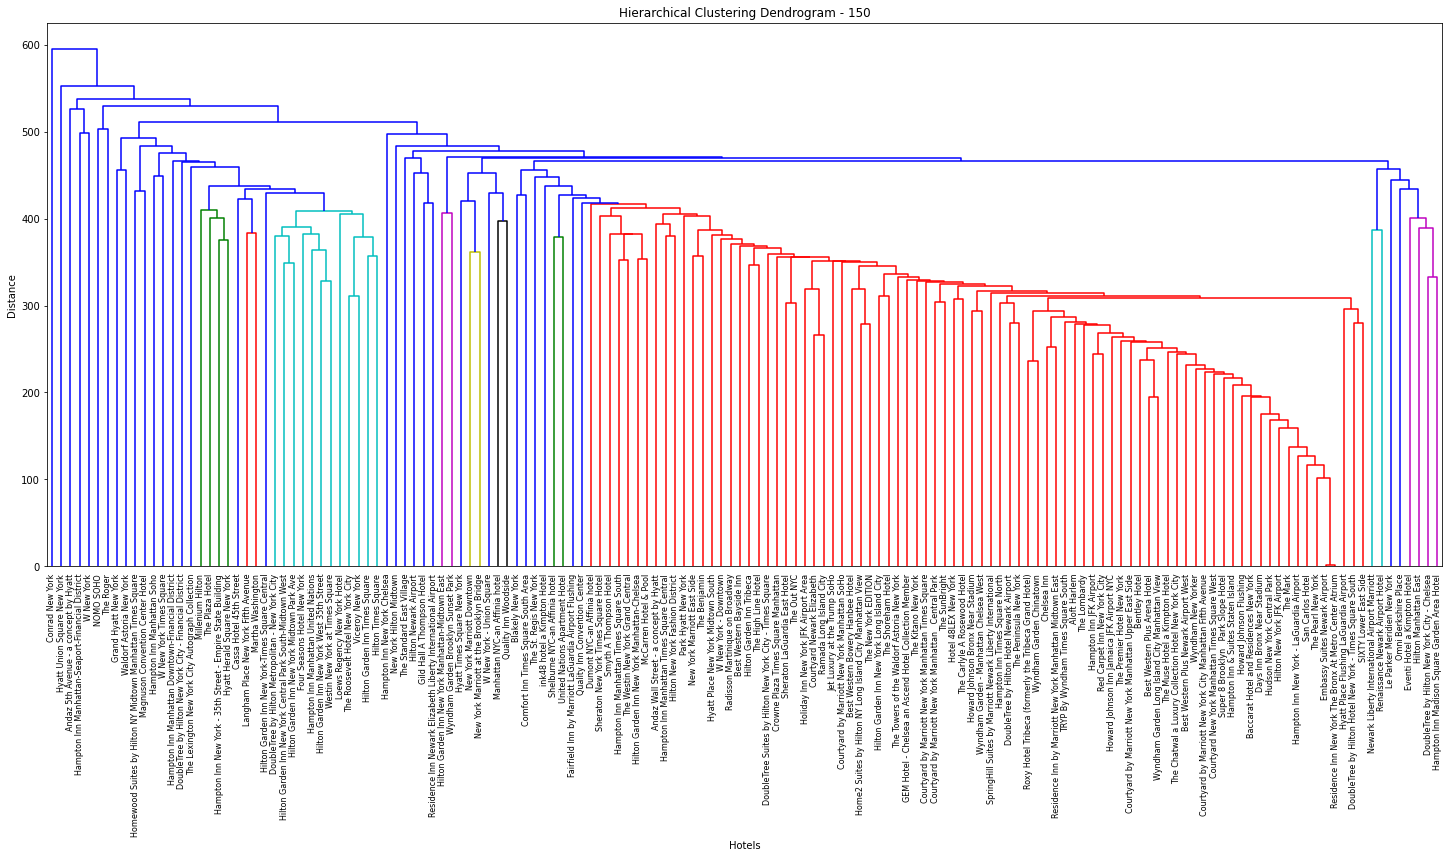

In [101]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - {}'.format(hotels_num))
plt.xlabel('Hotels')
plt.ylabel('Distance')

dendrogram(average,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=hotels_num,
    show_contracted=True,  # to get a distribution impression in truncated branches
    labels=normalised_hotels_prices.map(lambda x: x[0]).sortBy(lambda x: x).take(hotels_num)
)

plt.show()

### *** Explaining the Dendrogram ***

Each cluster has its own color.Therefore, for example, All of the hotels in the blue cluster have similar prices for the same dates.
